# Dependencies and files

## Install dependencies

## Imports

In [14]:
import warnings
import scanpy as sc
import anndata as an
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os

sc.settings.set_figure_params(dpi=80)
#sc.set_figure_params(facecolor="white", figsize=(8, 8))
warnings.simplefilter(action='ignore', category=FutureWarning)
sc.settings.verbosity = 3

# Global variables

In [15]:
de_dir_path = '../data/DE/ANOVA_zscore/'

In [16]:
layers = ['L1', 'L2', 'L3', 'L4', 'L5', "L6", 'WM']

In [17]:
os.listdir(de_dir_path)

['anova_mamm_zscore.csv',
 'cluster_spectr_anova_zscore_6.csv',
 'cluster_spectr_anova_zscore_7.csv',
 'cluster_spectr_anova_zscore_8.csv',
 'cluster_spectr_anova_zscore_9.csv',
 'ttest_human_monkey_zscore.csv',
 'ttest_mamm_zscore.csv']

### DE results

In [18]:
anova_res = pd.read_csv(de_dir_path + 'anova_mamm_zscore.csv', index_col=0)
anova_genes = anova_res[anova_res.p_val_adj < 0.05].index
anova_res.head()

sum_sq    df         F    PR(>F)  p_val_adj
A1BG   16.406416  12.0  2.634814  0.005952   0.024619
AAAS   11.650260  12.0  1.203083  0.299204   0.420750
AACS    7.838514  12.0  1.515760  0.140030   0.245693
AADAT  11.017066  12.0  1.720198  0.081496   0.166637
AAGAB  13.101968  12.0  1.491386  0.149069   0.256374

In [19]:
ttest_res = pd.read_csv(de_dir_path + 'ttest_mamm_zscore.csv', index_col=0)
ttest_res.head()

gene layer group1 group2     score    pvalue  p_val_adj
0   A1BG    L1  human  chimp -2.069551  0.083940   0.280856
1  AARS1    L1  human  chimp -0.106135  0.918935   0.963909
2   AATK    L1  human  chimp -0.913974  0.395973   0.625443
3   ABAT    L1  human  chimp  0.435186  0.678645   0.828286
4  ABCA2    L1  human  chimp -0.600076  0.570409   0.752111

In [20]:
n_clusters = 7
anova_labels = pd.read_csv(de_dir_path + f'cluster_spectr_anova_zscore_{n_clusters}.csv', index_col=0)['0'].sort_values()
anova_labels = anova_labels + 1
anova_labels.name = 'ANOVA_labels'

In [21]:
hum_spec_onehot = pd.read_csv('results/hum_spec_onehot.csv', index_col=0)
hum_spec_onehot

A1BG  AAAS  AACS  AADAT  AAGAB  AAK1  AAMDC  AAR2  AARS1  AASDHPPT  ...  \
L1     1     0     0      0      1     1      0     1      0         0  ...   
L2     0     1     0      1      0     1      0     0      0         0  ...   
L3     0     1     0      0      1     0      0     0      0         0  ...   
L4     0     1     1      0      0     0      0     0      0         0  ...   
L5     0     0     0      0      0     0      0     1      0         0  ...   
L6     0     0     0      0      0     0      0     0      1         1  ...   
WM     0     0     1      0      0     0      1     0      0         0  ...   

    ZSCAN30  ZSCAN9  ZSWIM5  ZSWIM6  ZSWIM7  ZUP1  ZYG11B  ZYX  ZZEF1  ZZZ3  
L1        0       1       0       0       0     0       0    0      0     1  
L2        0       0       0       0       0     0       0    0      0     0  
L3        0       0       0       0       0     0       1    0      0     0  
L4        0       1       0       0       1     0       0    0      1     0  
L5        0       0       0       0       0     1       0    0      0     0  
L6        0       0       1       1       0     0       0    0      0     0  
WM        1       0       0       0       0     0       0    1      0     0  

[7 rows x 6346 columns]

## Load normalized pseudobulks

In [22]:
pb_dir_path = '../data/pseudobulks/'

In [23]:
os.listdir(pb_dir_path)

['pb_age.h5ad',
 'pb_mammals.h5ad',
 'pb_mammals_filtered.h5ad',
 'pb_mammals_samplenorm_mean.h5ad',
 'pb_mammals_samplenorm_zscore.h5ad']

In [24]:
adata_pb = sc.read_h5ad(pb_dir_path + 'pb_mammals_filtered.h5ad')
adata_pb

AnnData object with n_obs × n_vars = 89 × 9208
    obs: 'layer', 'sample_id', 'psbulk_n_cells', 'psbulk_counts', 'condition', 'lib_size', 'log_lib_size'
    var: 'feature_types', 'mt', 'hb', 'ribo'
    layers: 'psbulk_props'

In [25]:
adata_pb_norm = sc.read_h5ad(pb_dir_path + 'pb_mammals_samplenorm_zscore.h5ad')
adata_pb_norm.var = anova_res
adata_pb_norm

AnnData object with n_obs × n_vars = 89 × 9208
    obs: 'layer', 'sample_id', 'psbulk_n_cells', 'psbulk_counts', 'condition', 'lib_size', 'log_lib_size'
    var: 'sum_sq', 'df', 'F', 'PR(>F)', 'p_val_adj'
    uns: 'log1p', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'psbulk_props'

In [26]:
adata_pb_norm_mean = sc.read_h5ad(pb_dir_path + 'pb_mammals_samplenorm_mean.h5ad')
#adata_pb_norm_mean.var = anova_res
adata_pb_norm_mean

AnnData object with n_obs × n_vars = 89 × 9208
    obs: 'layer', 'sample_id', 'psbulk_n_cells', 'psbulk_counts', 'condition', 'lib_size', 'log_lib_size'
    var: 'feature_types', 'mt', 'hb', 'ribo'
    uns: 'log1p', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'psbulk_props'

# Z-transform-like normalization

## Calculate differencies

In [27]:
adata_pb_norm[(adata_pb_norm.obs.condition == 'human') & (adata_pb_norm.obs.layer == 'L1')].obs

layer  sample_id  psbulk_n_cells  psbulk_counts condition  \
human_759_L1    L1  human_759           500.0       961453.0     human   
human_j12_L1    L1  human_j12           331.0       827957.0     human   
human_j3_L1     L1   human_j3           110.0       378096.0     human   
human_j4_L1     L1   human_j4           238.0       770218.0     human   
human_j6_L1     L1   human_j6           134.0       255642.0     human   

                 lib_size  log_lib_size  
human_759_L1  1922.906006      7.561593  
human_j12_L1  2501.380859      7.824598  
human_j3_L1   3437.236328      8.142423  
human_j4_L1   3236.209961      8.082158  
human_j6_L1   1907.776123      7.553693

In [28]:
# calculate average expr for each layer of each specie
mean_norm_expr_dict = dict()
for specie in ['human', 'chimp', 'macaque']:
    mean_norm_expr = pd.DataFrame(index=adata_pb_norm.var_names, columns=layers)
    for layer in layers:
        mean_norm_expr[layer] = np.array(adata_pb_norm[(adata_pb_norm.obs.condition == specie) &
                                                       (adata_pb_norm.obs.layer == layer)].X.mean(axis=0))
    mean_norm_expr_dict[specie] = mean_norm_expr

In [29]:
# calculate diff
human_chimp_diff = mean_norm_expr_dict['human'] - mean_norm_expr_dict['chimp']
human_macaque_diff = mean_norm_expr_dict['human'] - mean_norm_expr_dict['macaque']
chimp_macaque_diff = mean_norm_expr_dict['chimp'] - mean_norm_expr_dict['macaque']

Text(0.5, 1.0, 'chimp vs macaque diff')

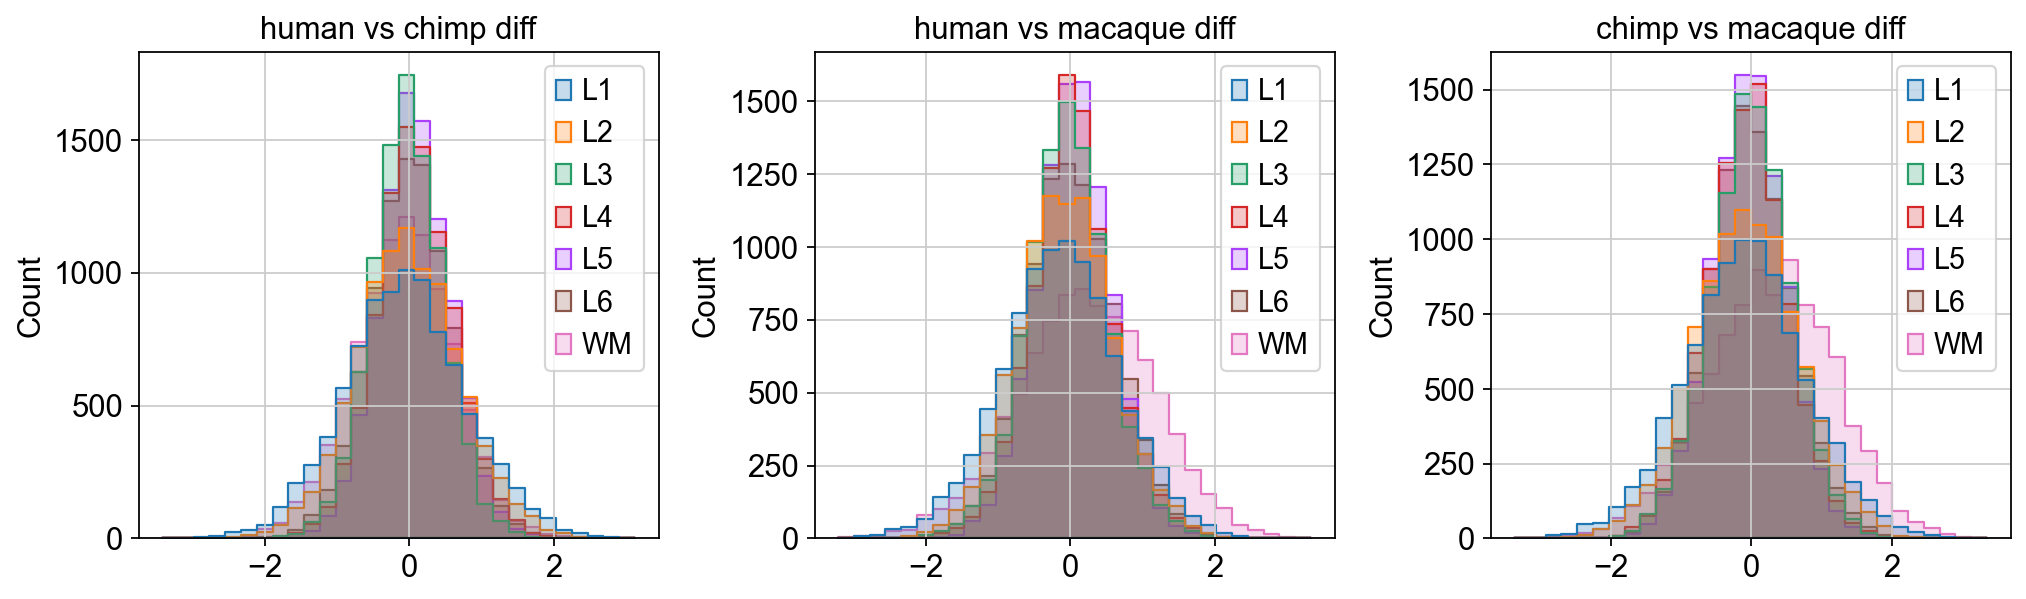

In [30]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4), gridspec_kw={'wspace': 0.3})

sns.histplot(human_chimp_diff, bins=30, element="step", ax=ax[0])
ax[0].set_title('human vs chimp diff')

sns.histplot(human_macaque_diff, bins=30, element="step", ax=ax[1])
ax[1].set_title('human vs macaque diff')

sns.histplot(chimp_macaque_diff, bins=30, element="step", ax=ax[2])
ax[2].set_title('chimp vs macaque diff')

Text(0, 0.5, 'Number of genes')

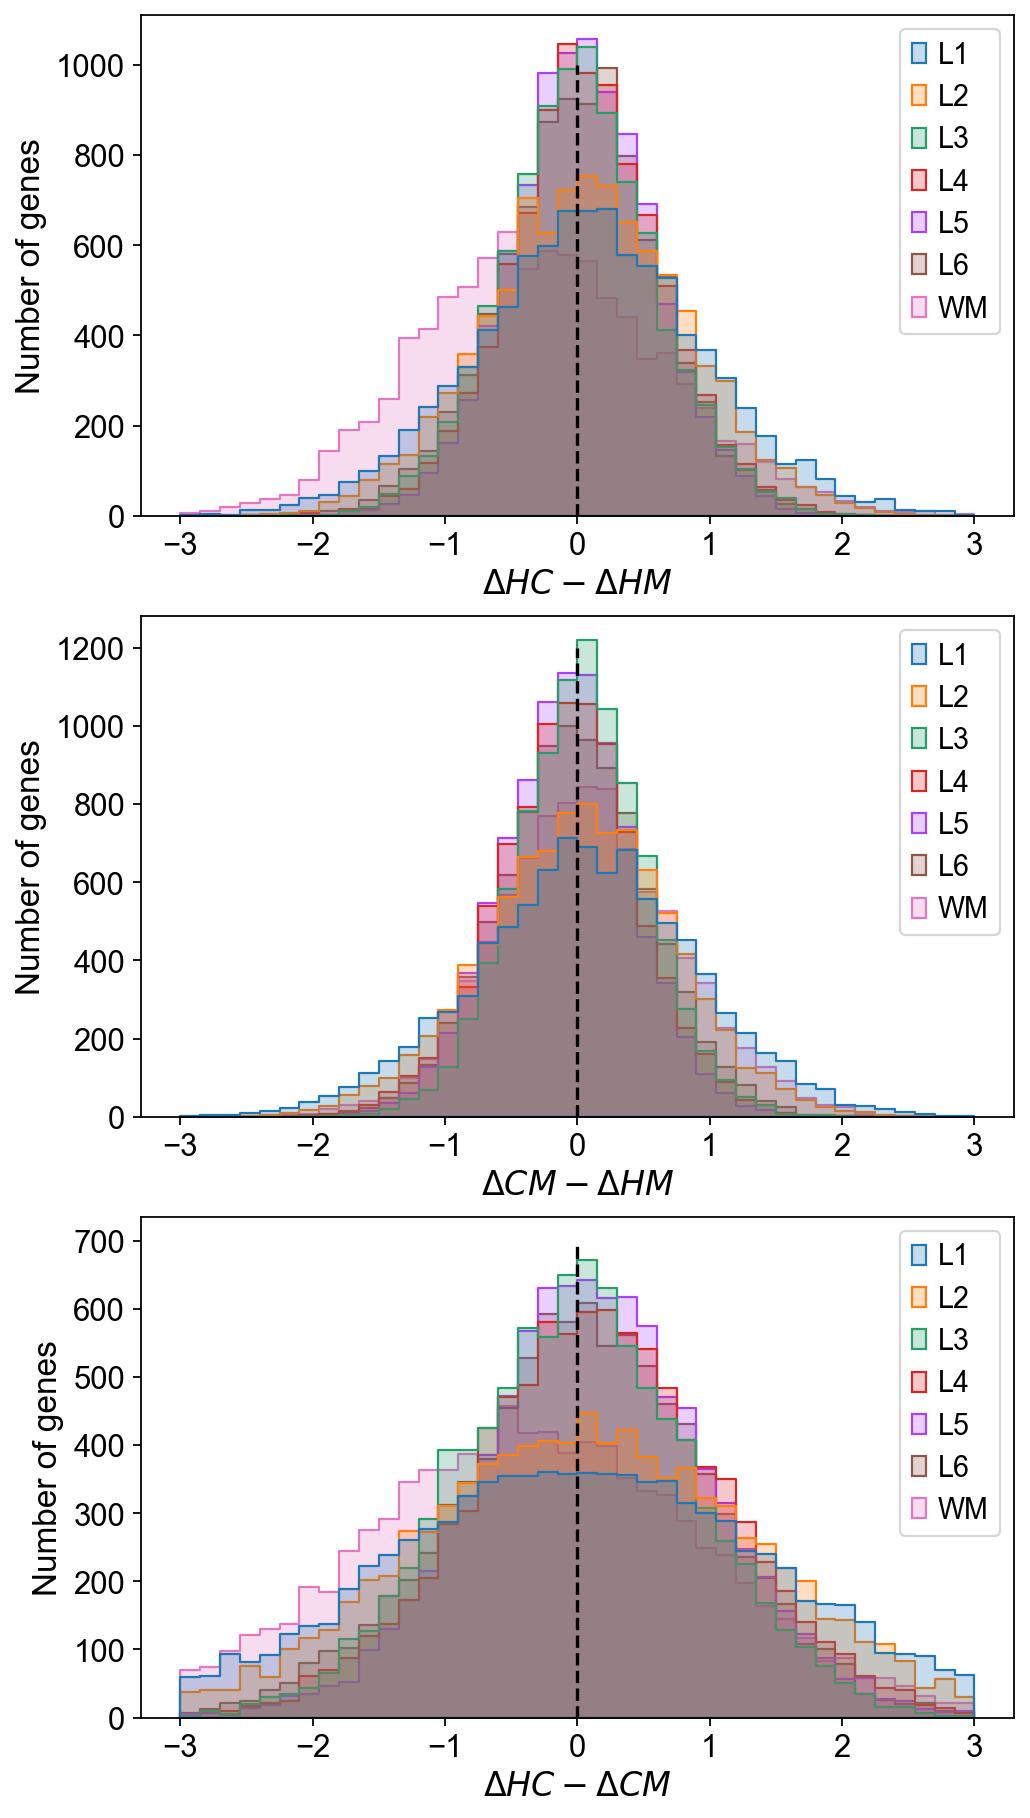

In [31]:
fig, ax = plt.subplots(3, 1, figsize=(7, 14))

data_to_plot = human_chimp_diff - human_macaque_diff
sns.histplot(data_to_plot, element="step", binrange=[-3, 3], bins=40, ax=ax[0])
ax[0].vlines(0, ymin=0, ymax=1000, colors='black', linestyles='dashed')
ax[0].grid(False)
ax[0].set_xlabel('$\Delta HC - \Delta HM$', fontsize=15)
ax[0].set_ylabel('Number of genes', fontsize=15)

data_to_plot = chimp_macaque_diff - human_macaque_diff
sns.histplot(data_to_plot, element="step", binrange=[-3, 3], bins=40, ax=ax[1])
ax[1].vlines(0, ymin=0, ymax=1200, colors='black', linestyles='dashed')
ax[1].grid(False)
ax[1].set_xlabel('$\Delta CM - \Delta HM$', fontsize=15)
ax[1].set_ylabel('Number of genes', fontsize=15)

data_to_plot = human_chimp_diff - chimp_macaque_diff
sns.histplot(data_to_plot, element="step", binrange=[-3, 3], bins=40, ax=ax[2])
ax[2].vlines(0, ymin=0, ymax=700, colors='black', linestyles='dashed')
ax[2].grid(False)
ax[2].set_xlabel('$\Delta HC - \Delta CM$', fontsize=15)
ax[2].set_ylabel('Number of genes', fontsize=15)

## Let's explore

In [32]:
#human_chimp_diff, human_macaque_diff, chimp_macaque_diff

In [33]:
hc_l1 = human_chimp_diff.abs().sum(axis=1)
hm_l1 = human_macaque_diff.abs().sum(axis=1)
cm_l1 = chimp_macaque_diff.abs().sum(axis=1)

(0.0, 10.0)

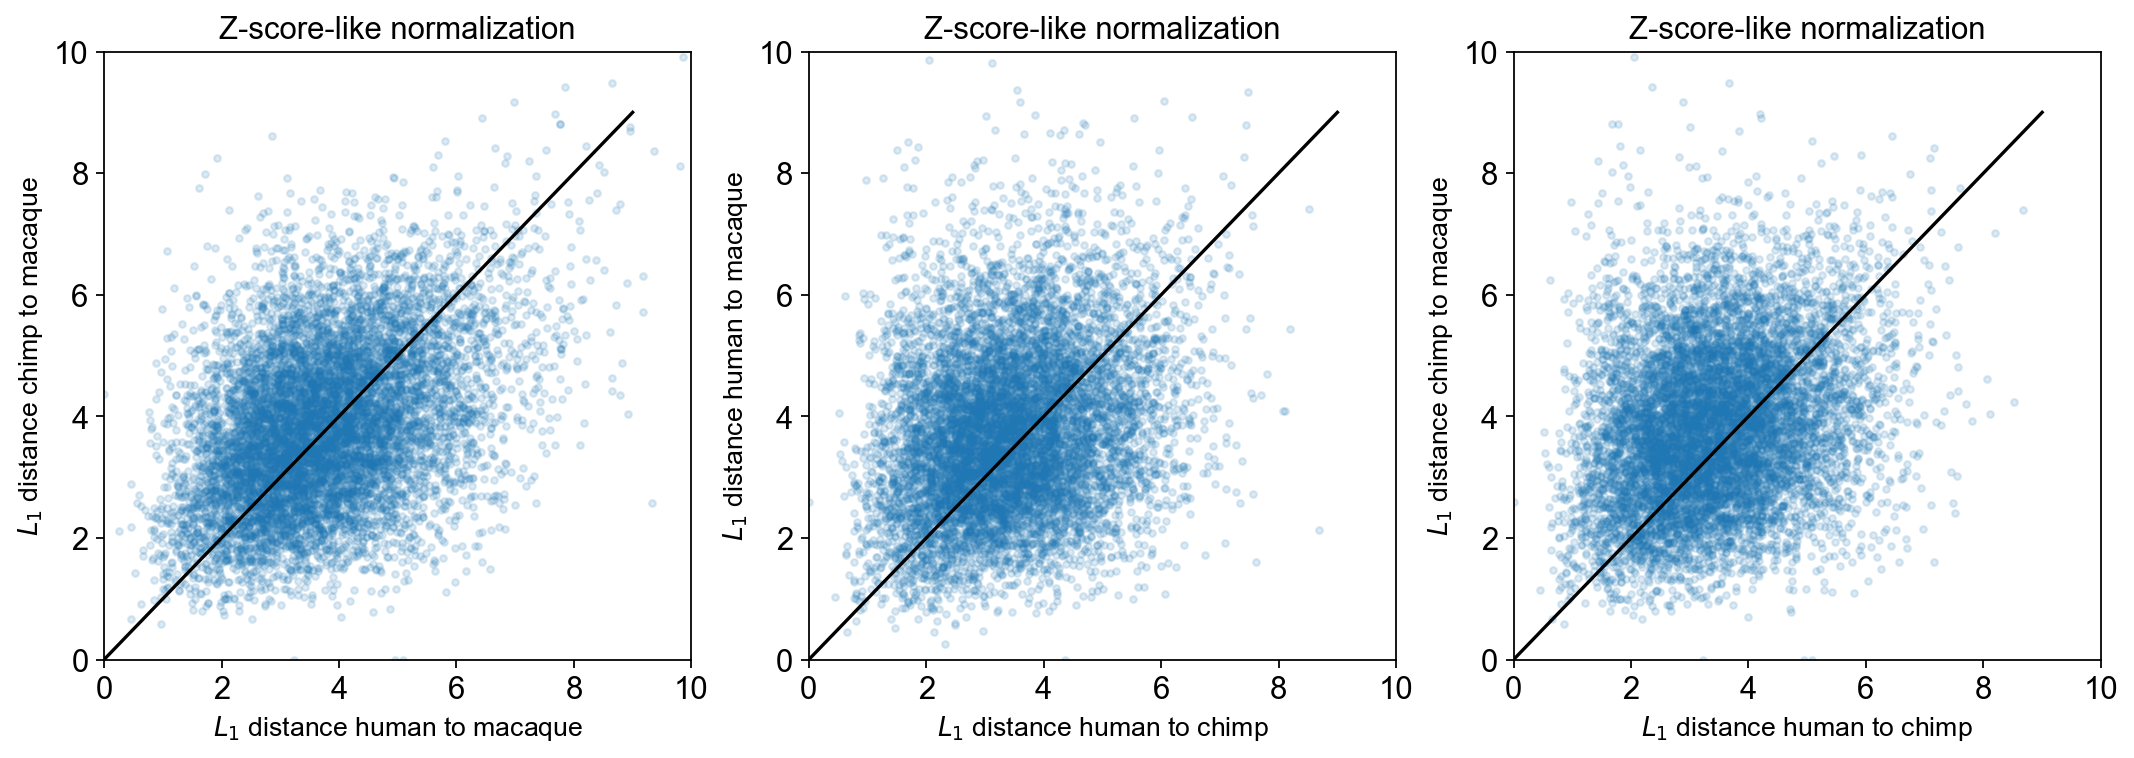

In [34]:
fig, ax = plt.subplots(1, 3, figsize=(16, 5))

ax[0].plot(hm_l1, cm_l1, '.', alpha=0.15)
ax[0].plot([0, 9], [0, 9], 'black')
ax[0].set_title('Z-score-like normalization')
ax[0].set_xlabel('$L_1$ distance human to macaque', fontsize=12)
ax[0].set_ylabel('$L_1$ distance chimp to macaque', fontsize=12)
ax[0].grid(False)
ax[0].set_xlim(0, 10)
ax[0].set_ylim(0, 10)

ax[1].plot(hc_l1, hm_l1, '.', alpha=0.15)
ax[1].plot([0, 9], [0, 9], 'black')
ax[1].set_title('Z-score-like normalization')
ax[1].set_xlabel('$L_1$ distance human to chimp', fontsize=12)
ax[1].set_ylabel('$L_1$ distance human to macaque', fontsize=12)
ax[1].grid(False)
ax[1].set_xlim(0, 10)
ax[1].set_ylim(0, 10)

ax[2].plot(hc_l1, cm_l1, '.', alpha=0.15)
ax[2].plot([0, 9], [0, 9], 'black')
ax[2].set_title('Z-score-like normalization')
ax[2].set_xlabel('$L_1$ distance human to chimp', fontsize=12)
ax[2].set_ylabel('$L_1$ distance chimp to macaque', fontsize=12)
ax[2].grid(False)
ax[2].set_xlim(0, 10)
ax[2].set_ylim(0, 10)

In [35]:
hc_l1 = human_chimp_diff.abs().sum(axis=1)
hm_l1 = human_macaque_diff.abs().sum(axis=1)
cm_l1 = chimp_macaque_diff.abs().sum(axis=1)

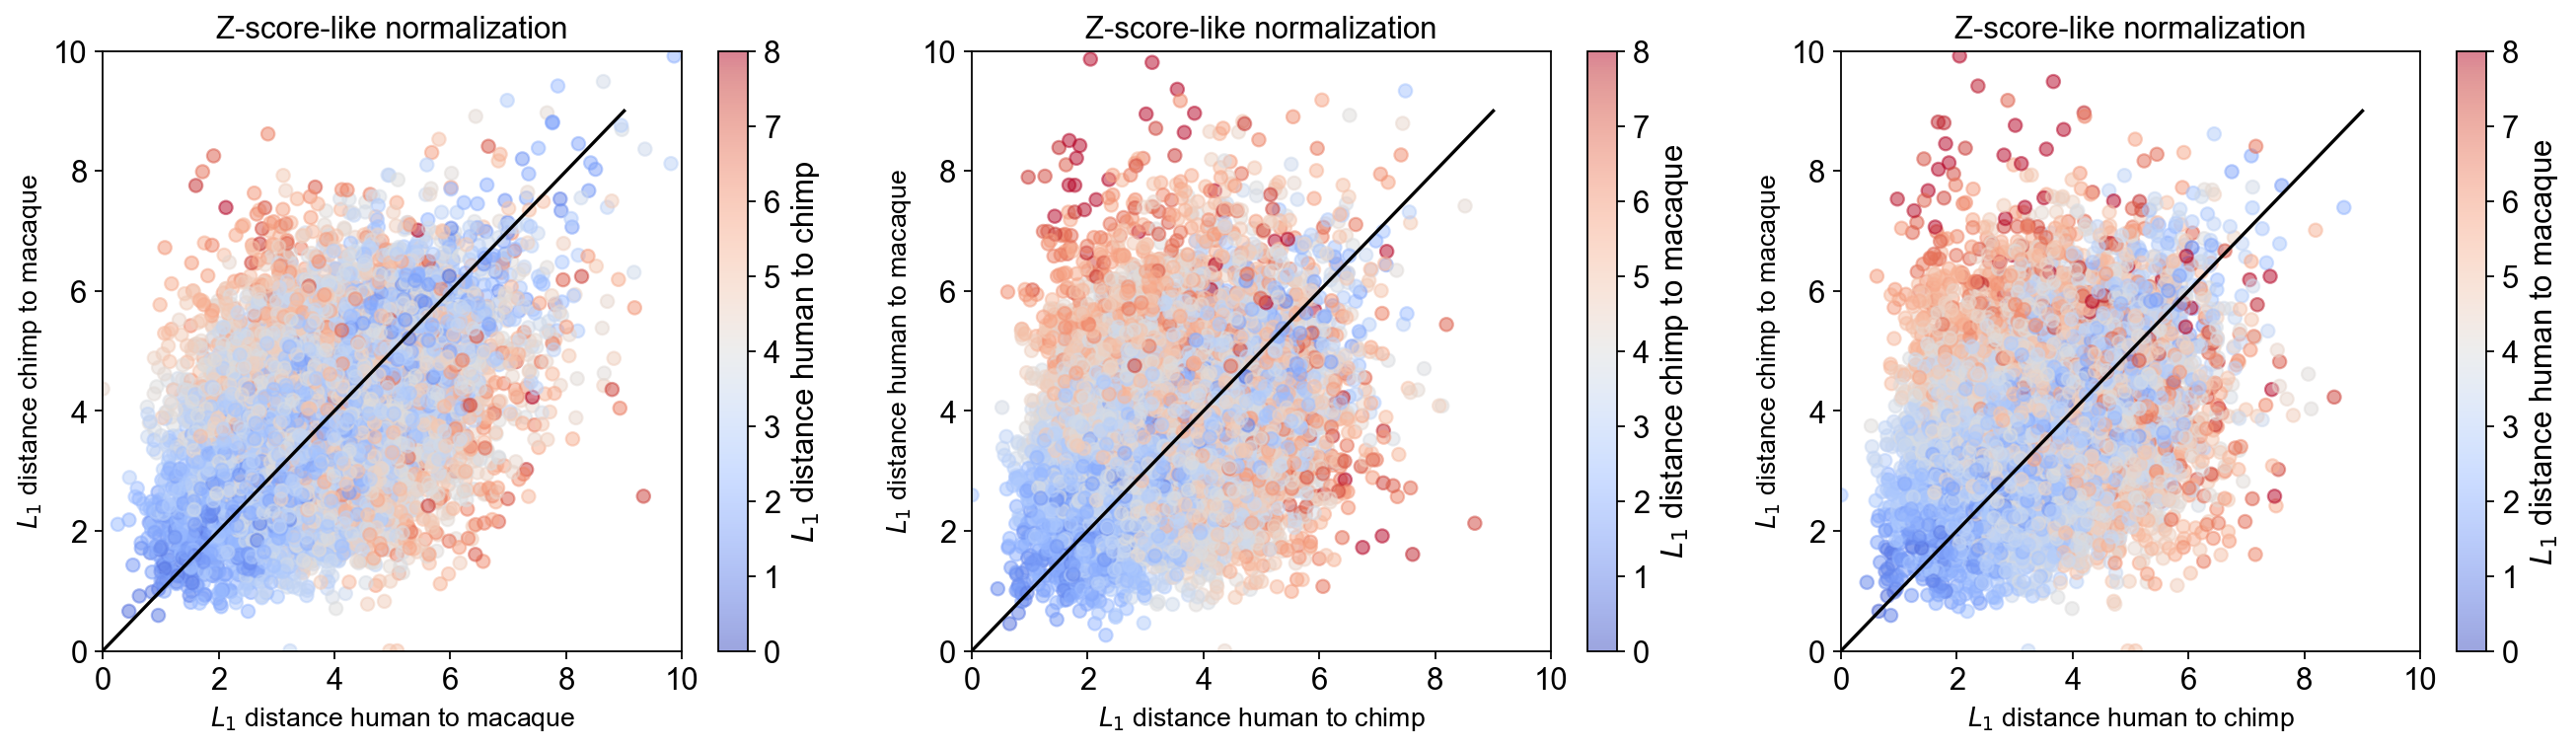

In [36]:
import matplotlib as mpl
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
cmap = mpl.cm.coolwarm
norm = mpl.colors.Normalize(vmin=0, vmax=8, clip=True)
marker = 'o'
alpha = 0.5

im = ax[0].scatter(hm_l1, cm_l1, c=hc_l1, alpha=alpha, cmap=cmap, norm=norm, marker=marker)
ax[0].plot([0, 9], [0, 9], 'black')
ax[0].set_title('Z-score-like normalization')
ax[0].set_xlabel('$L_1$ distance human to macaque', fontsize=12)
ax[0].set_ylabel('$L_1$ distance chimp to macaque', fontsize=12)
ax[0].grid(False)
ax[0].set_xlim(0, 10)
ax[0].set_ylim(0, 10)
fig.colorbar(im, ax=ax[0], label="$L_1$ distance human to chimp")

im = ax[1].scatter(hc_l1, hm_l1, c=cm_l1, alpha=alpha, cmap=cmap, norm=norm, marker=marker)
ax[1].plot([0, 9], [0, 9], 'black')
ax[1].set_title('Z-score-like normalization')
ax[1].set_xlabel('$L_1$ distance human to chimp', fontsize=12)
ax[1].set_ylabel('$L_1$ distance human to macaque', fontsize=12)
ax[1].grid(False)
ax[1].set_xlim(0, 10)
ax[1].set_ylim(0, 10)
fig.colorbar(im, ax=ax[1], label="$L_1$ distance chimp to macaque")

im = ax[2].scatter(hc_l1, cm_l1, c=hm_l1, alpha=alpha, cmap=cmap, norm=norm, marker=marker)
ax[2].plot([0, 9], [0, 9], 'black')
ax[2].set_title('Z-score-like normalization')
ax[2].set_xlabel('$L_1$ distance human to chimp', fontsize=12)
ax[2].set_ylabel('$L_1$ distance chimp to macaque', fontsize=12)
ax[2].grid(False)
ax[2].set_xlim(0, 10)
ax[2].set_ylim(0, 10)
fig.colorbar(im, ax=ax[2], label="$L_1$ distance human to macaque")
plt.show()

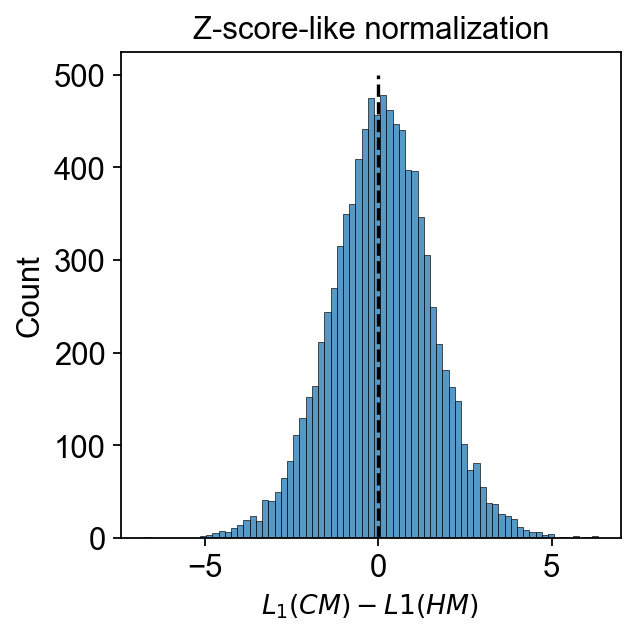

In [37]:
sns.histplot(cm_l1 - hm_l1)
plt.vlines(0, ymin=0, ymax=500, colors='black', linestyles='dashed')
plt.title('Z-score-like normalization')
plt.xlabel('$L_1(CM) - L1(HM)$ ', fontsize=12)
plt.grid(False)

In [38]:
((cm_l1 - hm_l1) < 0).sum(), ((cm_l1 - hm_l1) > 0).sum()

(4319, 4888)

## Human-specific

Filter genes:
$$
L_1(HM) > L_1(CM)
$$

and

$$
L_1(HC) >= q
$$

In [39]:
quantile = 0.95
quant_value = hc_l1.quantile(quantile)
quant_value

5.61586537361145

Text(0.5, 1.0, '$L_1$ distance human vs chimp')

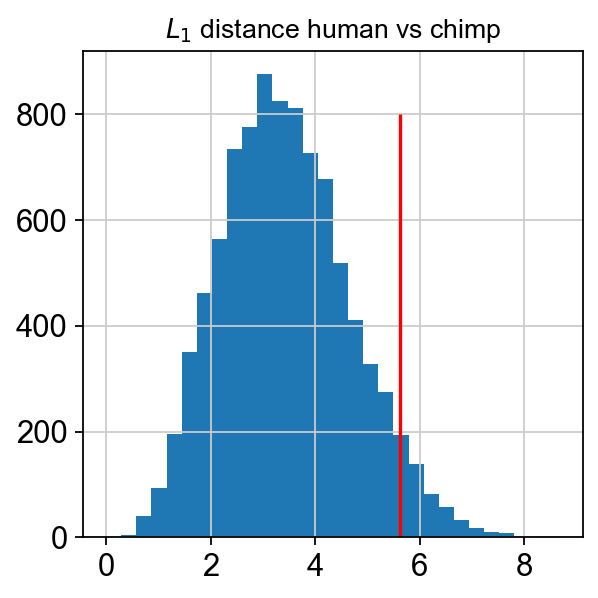

In [40]:
plt.vlines(quant_value, ymin=0, ymax=800,colors='red')
hc_l1.hist(bins=30)
plt.title('$L_1$ distance human vs chimp', fontsize=12)

In [41]:
gene_filter1 = (hm_l1 > cm_l1)
gene_filter2 = (hc_l1 >= quant_value)
gene_filter2.sum()

461

In [42]:
hs_genes = hc_l1[(gene_filter1) & (gene_filter2)].index
hs_genes

Index(['ABHD11', 'ABL2', 'ACSL4', 'ADGRB3', 'AGGF1', 'AMZ2', 'ANKRD11',
       'ANKS1B', 'APBB2', 'APIP',
       ...
       'VTI1B', 'XPR1', 'YIPF5', 'ZBTB46', 'ZCCHC14', 'ZCCHC17', 'ZDHHC1',
       'ZEB2', 'ZMYND8', 'ZNF382'],
      dtype='object', length=224)

## Chimp-specific

In [43]:
gene_filter1 = (cm_l1 > hm_l1)
gene_filter2 = (hc_l1 >= quant_value)
gene_filter2.sum()

461

In [44]:
cs_genes = hc_l1[(gene_filter1) & (gene_filter2)].index
cs_genes

Index(['ABI3BP', 'ACHE', 'ACTL6B', 'ACTN2', 'ADCYAP1R1', 'ADD2', 'AGL',
       'AKIP1', 'ALG6', 'ALKBH5',
       ...
       'VWA5A', 'VWC2', 'WDR37', 'YPEL5', 'ZBTB38', 'ZNF146', 'ZNF22',
       'ZNF420', 'ZNF771', 'ZSWIM6'],
      dtype='object', length=237)

## Macaque-specific

In [45]:
gene_filter1 = (hm_l1 > hc_l1)
gene_filter2 = (cm_l1 >= quant_value)
gene_filter2.sum()

915

In [46]:
ms_genes = hc_l1[(gene_filter1) & (gene_filter2)].index
ms_genes

Index(['AARS1', 'ABAT', 'ABR', 'ACAD9', 'ACADSB', 'ACTN1', 'ACTN4', 'ADAM11',
       'ADAM19', 'ADIRF',
       ...
       'ZDHHC12', 'ZDHHC22', 'ZHX3', 'ZNF277', 'ZNF304', 'ZNF398', 'ZNF462',
       'ZNF581', 'ZNF655', 'ZNF768'],
      dtype='object', length=578)

## Compare a number of human-specific vs chimp-specific

In [47]:
tr_list = np.linspace(5, 10)
hs_num = []
cs_num = []
ms_num = []
quant_list = [0.8, 0.85, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99, 0.995, 0.999]
for tr in tr_list:
    #qv = hc_l1.quantile(q)
    # hs
    gene_filter1 = (hm_l1 > cm_l1)
    gene_filter2 = (hc_l1 >= tr)
    hs_num.append(hc_l1[(gene_filter1) & (gene_filter2)].index.size)
    # cs
    gene_filter1 = (cm_l1 > hm_l1)
    gene_filter2 = (hc_l1 >= tr)
    cs_num.append(hc_l1[(gene_filter1) & (gene_filter2)].index.size)
    # ms
    gene_filter1 = (hm_l1 > hc_l1)
    gene_filter2 = (cm_l1 >= tr)
    ms_num.append(hm_l1[(gene_filter1) & (gene_filter2)].index.size)

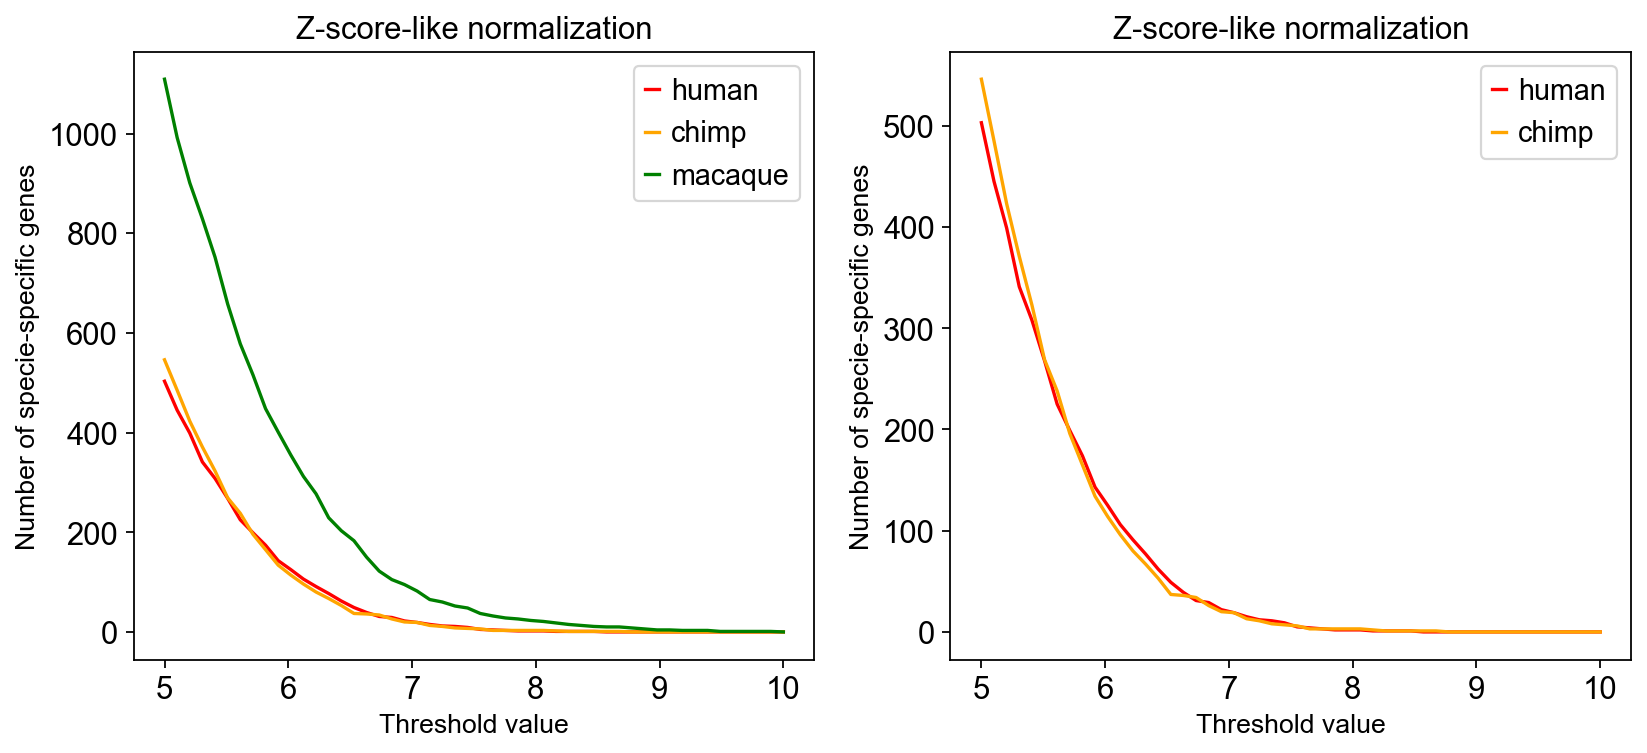

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(tr_list, hs_num, 'r-')
ax[0].plot(tr_list, cs_num, '-', c='orange')
ax[0].plot(tr_list, ms_num, '-', c='green')
ax[0].set_title('Z-score-like normalization')
ax[0].set_xlabel('Threshold value', fontsize=12)
ax[0].set_ylabel('Number of specie-specific genes', fontsize=12)
ax[0].legend(['human', 'chimp', 'macaque'])
ax[0].grid(False)

ax[1].plot(tr_list, hs_num, 'r-')
ax[1].plot(tr_list, cs_num, '-', c='orange')
ax[1].set_title('Z-score-like normalization')
ax[1].set_xlabel('Threshold value', fontsize=12)
ax[1].set_ylabel('Number of specie-specific genes', fontsize=12)
ax[1].legend(['human', 'chimp', 'macaque'])
ax[1].grid(False)

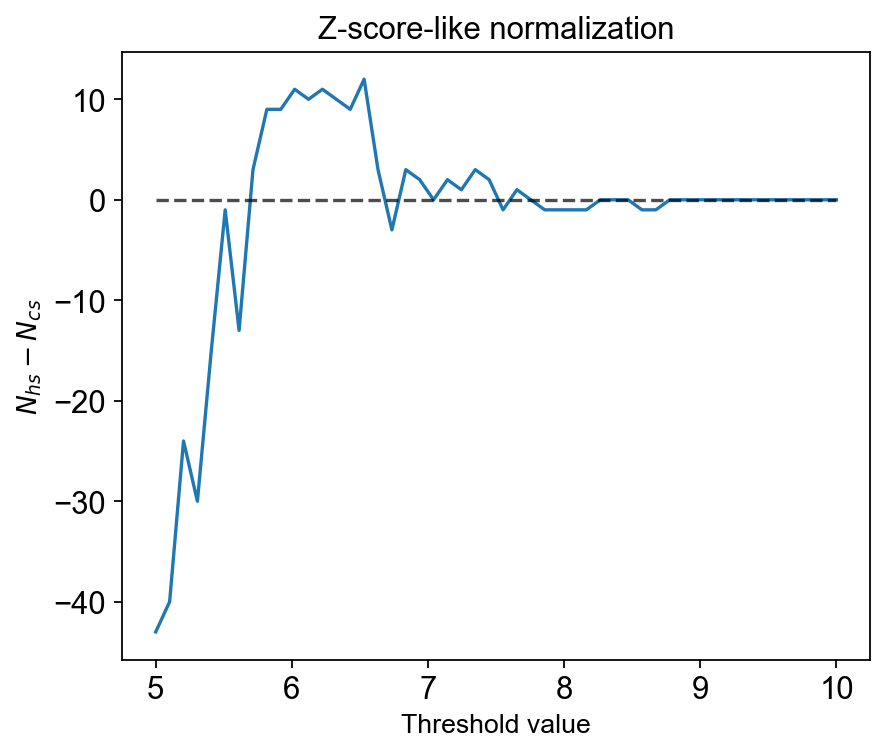

In [49]:
fig, ax = plt.subplots(figsize=(6, 5))
plt.plot(tr_list, np.array(hs_num) - np.array(cs_num), '-')
plt.hlines(0, xmin=5, xmax=10, colors='black', linestyles='dashed', alpha=0.7)
plt.title('Z-score-like normalization')
plt.xlabel('Threshold value', fontsize=12)
plt.ylabel('$N_{hs} - N_{cs}$', fontsize=12)
plt.grid(False)

# Mean normalization

## Calculate differencies

In [50]:
adata_pb_norm_mean[(adata_pb_norm_mean.obs.condition == 'human') & (adata_pb_norm_mean.obs.layer == 'L1')].obs

layer  sample_id  psbulk_n_cells  psbulk_counts condition  \
human_759_L1    L1  human_759           500.0       961453.0     human   
human_j12_L1    L1  human_j12           331.0       827957.0     human   
human_j3_L1     L1   human_j3           110.0       378096.0     human   
human_j4_L1     L1   human_j4           238.0       770218.0     human   
human_j6_L1     L1   human_j6           134.0       255642.0     human   

                 lib_size  log_lib_size  
human_759_L1  1922.906006      7.561593  
human_j12_L1  2501.380859      7.824598  
human_j3_L1   3437.236328      8.142423  
human_j4_L1   3236.209961      8.082158  
human_j6_L1   1907.776123      7.553693

In [51]:
# calculate average expr for each layer of each specie
mean_norm_expr_dict = dict()
for specie in ['human', 'chimp', 'macaque']:
    mean_norm_expr = pd.DataFrame(index=adata_pb_norm_mean.var_names, columns=layers)
    for layer in layers:
        mean_norm_expr[layer] = np.array(adata_pb_norm_mean[(adata_pb_norm_mean.obs.condition == specie) &
                                                       (adata_pb_norm_mean.obs.layer == layer)].X.mean(axis=0))
    mean_norm_expr_dict[specie] = mean_norm_expr

In [52]:
# calculate diff
human_chimp_diff = mean_norm_expr_dict['human'] - mean_norm_expr_dict['chimp']
human_macaque_diff = mean_norm_expr_dict['human'] - mean_norm_expr_dict['macaque']
chimp_macaque_diff = mean_norm_expr_dict['chimp'] - mean_norm_expr_dict['macaque']

Text(0.5, 1.0, 'chimp vs macaque diff')

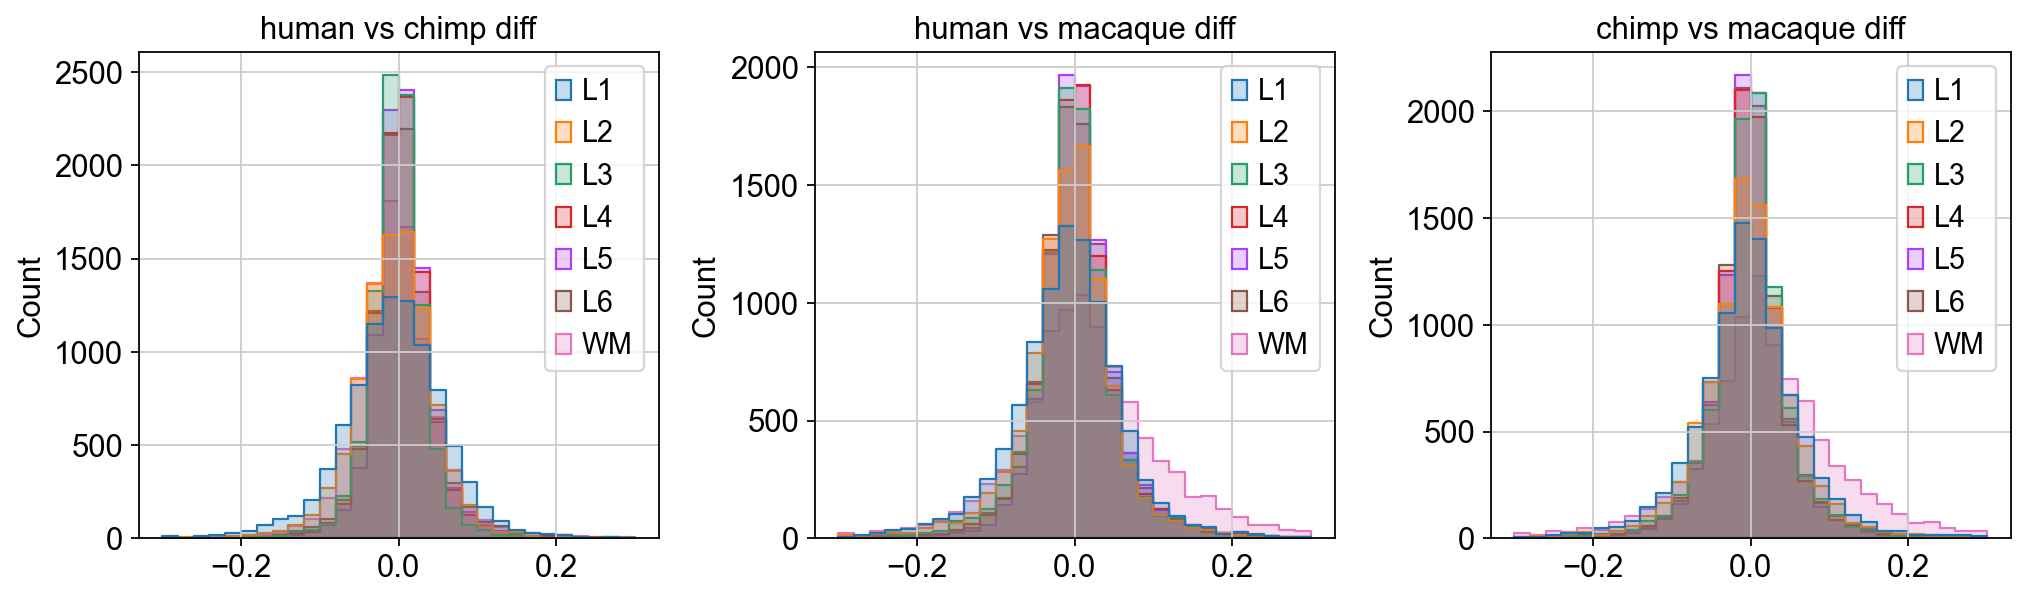

In [53]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4), gridspec_kw={'wspace': 0.3})

sns.histplot(human_chimp_diff, bins=30, element="step", ax=ax[0], binrange=[-0.3, 0.3])
ax[0].set_title('human vs chimp diff')

sns.histplot(human_macaque_diff, bins=30, element="step", ax=ax[1], binrange=[-0.3, 0.3])
ax[1].set_title('human vs macaque diff')

sns.histplot(chimp_macaque_diff, bins=30, element="step", ax=ax[2], binrange=[-0.3, 0.3])
ax[2].set_title('chimp vs macaque diff')

Text(0, 0.5, 'Number of genes')

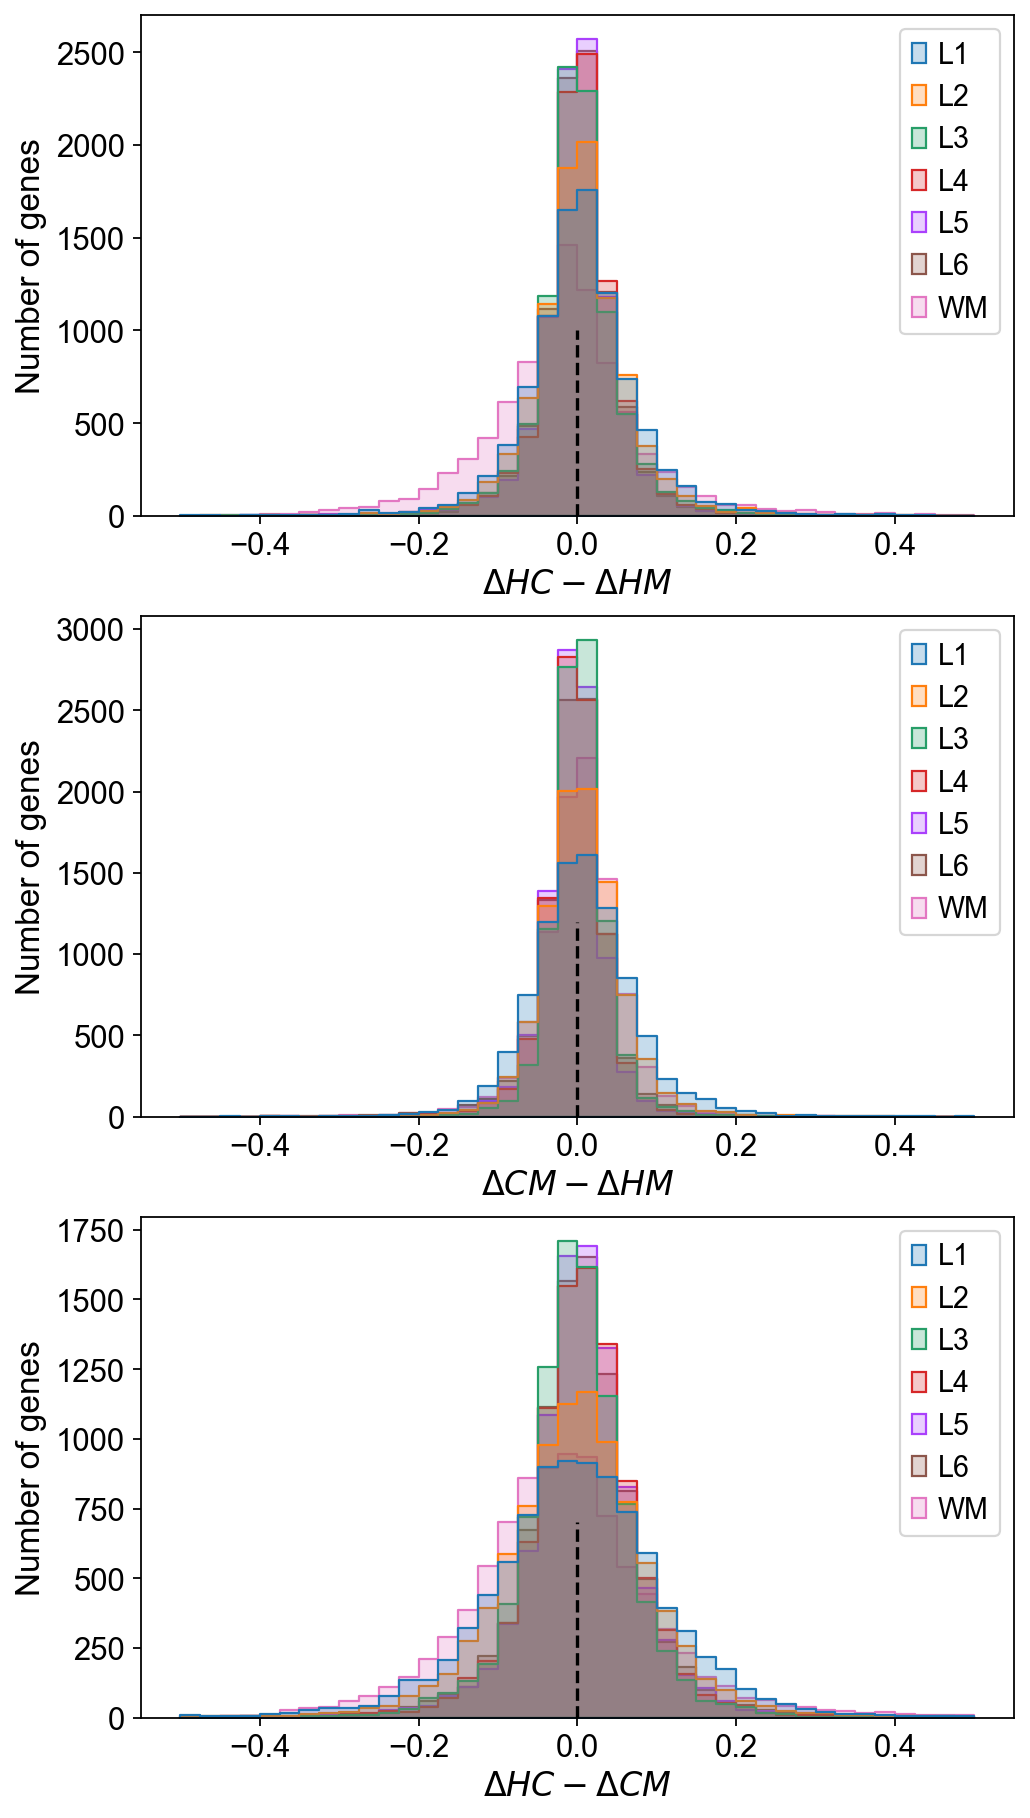

In [54]:
fig, ax = plt.subplots(3, 1, figsize=(7, 14))

data_to_plot = human_chimp_diff - human_macaque_diff
sns.histplot(data_to_plot, element="step", binrange=[-0.5, 0.5], bins=40, ax=ax[0])
ax[0].vlines(0, ymin=0, ymax=1000, colors='black', linestyles='dashed')
ax[0].grid(False)
ax[0].set_xlabel('$\Delta HC - \Delta HM$', fontsize=15)
ax[0].set_ylabel('Number of genes', fontsize=15)

data_to_plot = chimp_macaque_diff - human_macaque_diff
sns.histplot(data_to_plot, element="step", binrange=[-0.5, 0.5], bins=40, ax=ax[1])
ax[1].vlines(0, ymin=0, ymax=1200, colors='black', linestyles='dashed')
ax[1].grid(False)
ax[1].set_xlabel('$\Delta CM - \Delta HM$', fontsize=15)
ax[1].set_ylabel('Number of genes', fontsize=15)

data_to_plot = human_chimp_diff - chimp_macaque_diff
sns.histplot(data_to_plot, element="step", binrange=[-0.5, 0.5], bins=40, ax=ax[2])
ax[2].vlines(0, ymin=0, ymax=700, colors='black', linestyles='dashed')
ax[2].grid(False)
ax[2].set_xlabel('$\Delta HC - \Delta CM$', fontsize=15)
ax[2].set_ylabel('Number of genes', fontsize=15)

## Let's explore

In [55]:
#human_chimp_diff, human_macaque_diff, chimp_macaque_diff

In [56]:
hc_l1_mean = human_chimp_diff.abs().sum(axis=1)
hm_l1_mean = human_macaque_diff.abs().sum(axis=1)
cm_l1_mean = chimp_macaque_diff.abs().sum(axis=1)

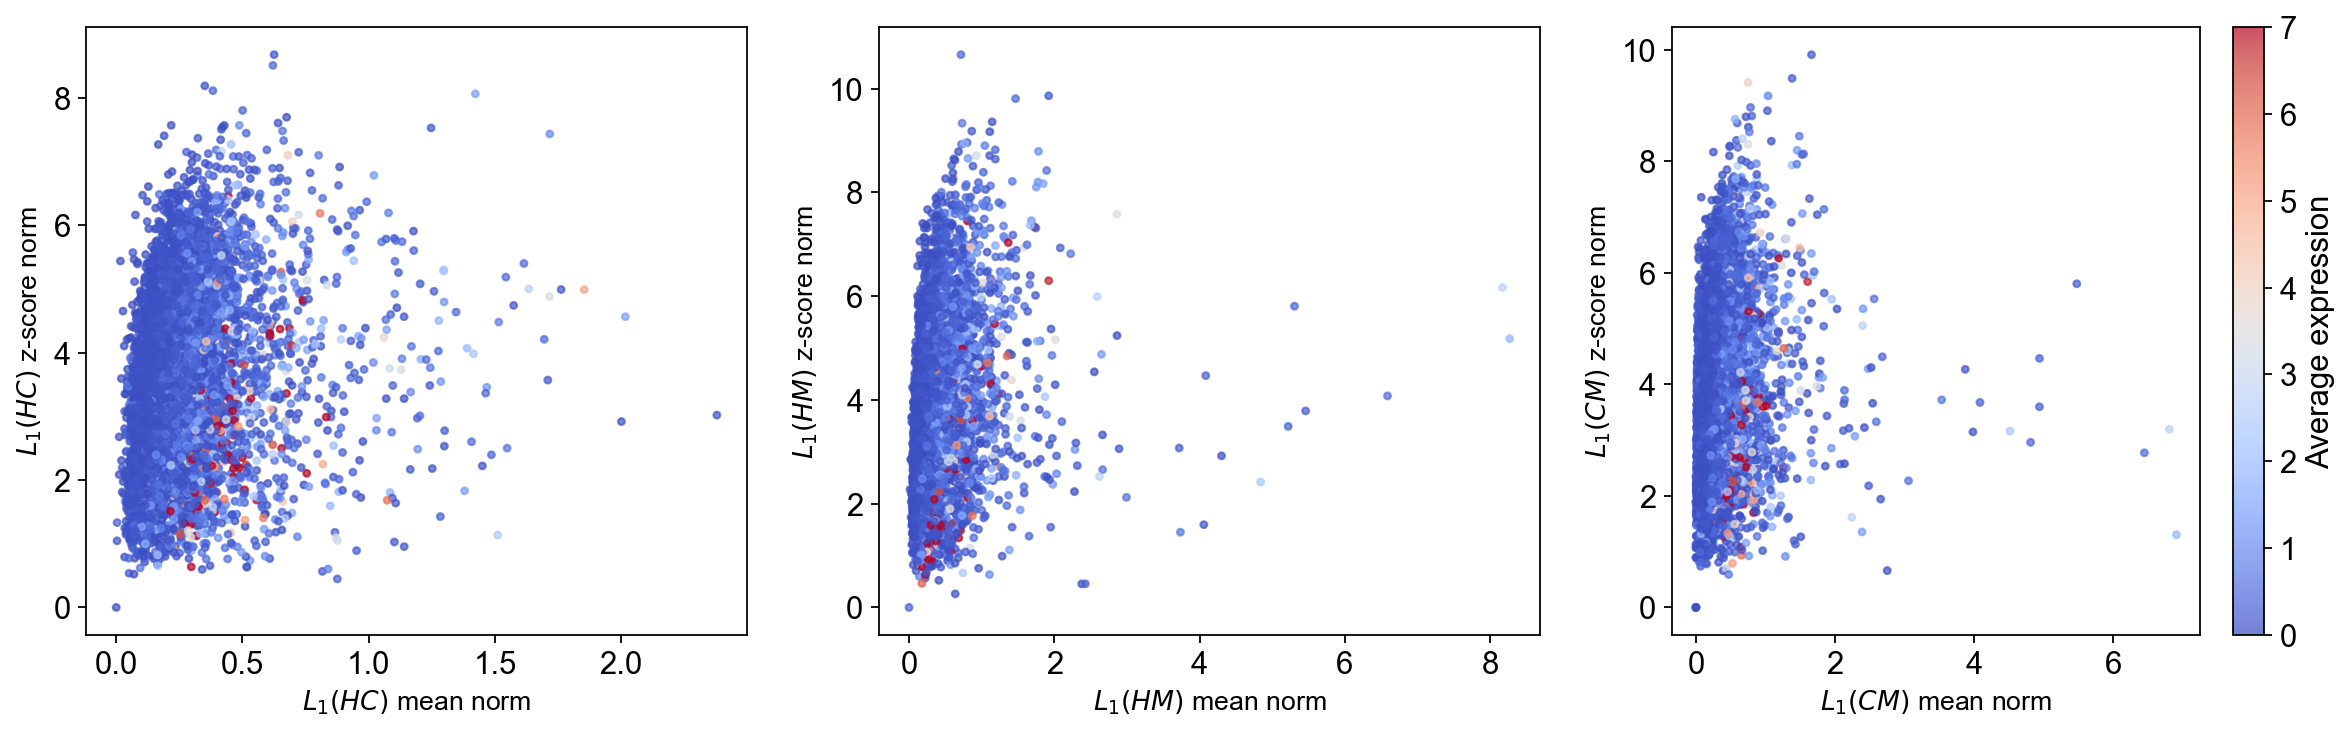

In [57]:
import matplotlib as mpl

fig, ax = plt.subplots(1, 3, figsize=(18, 5))
intersect = hc_l1_mean.index.intersection(hc_l1.index)

cmap = mpl.cm.coolwarm
norm = mpl.colors.Normalize(vmin=0, vmax=7, clip=True)

im = ax[0].scatter(hc_l1_mean.loc[intersect], hc_l1.loc[intersect], c=adata_pb.X.mean(axis=0), cmap=cmap, norm=norm, alpha=0.7, marker='.')
#ax[0].set_title('Normalization on average')
ax[0].set_xlabel('$L_1(HC)$ mean norm', fontsize=12)
ax[0].set_ylabel('$L_1(HC)$ z-score norm', fontsize=12)
ax[0].grid(False)

ax[1].scatter(hm_l1_mean.loc[intersect], hm_l1.loc[intersect], c=adata_pb.X.mean(axis=0), cmap=cmap, norm=norm, alpha=0.7, marker='.')
#ax[1].set_title('Normalization on average')
ax[1].set_xlabel('$L_1(HM)$ mean norm', fontsize=12)
ax[1].set_ylabel('$L_1(HM)$ z-score norm', fontsize=12)
ax[1].grid(False)

ax[2].scatter(cm_l1_mean.loc[intersect], cm_l1.loc[intersect], c=adata_pb.X.mean(axis=0), cmap=cmap, norm=norm, alpha=0.7, marker='.')
#ax[2].set_title('Normalization on average')
ax[2].set_xlabel('$L_1(CM)$ mean norm', fontsize=12)
ax[2].set_ylabel('$L_1(CM)$ z-score norm', fontsize=12)
ax[2].grid(False)

fig.colorbar(im, ax=ax[2], label="Average expression")

(0.0, 8.0)

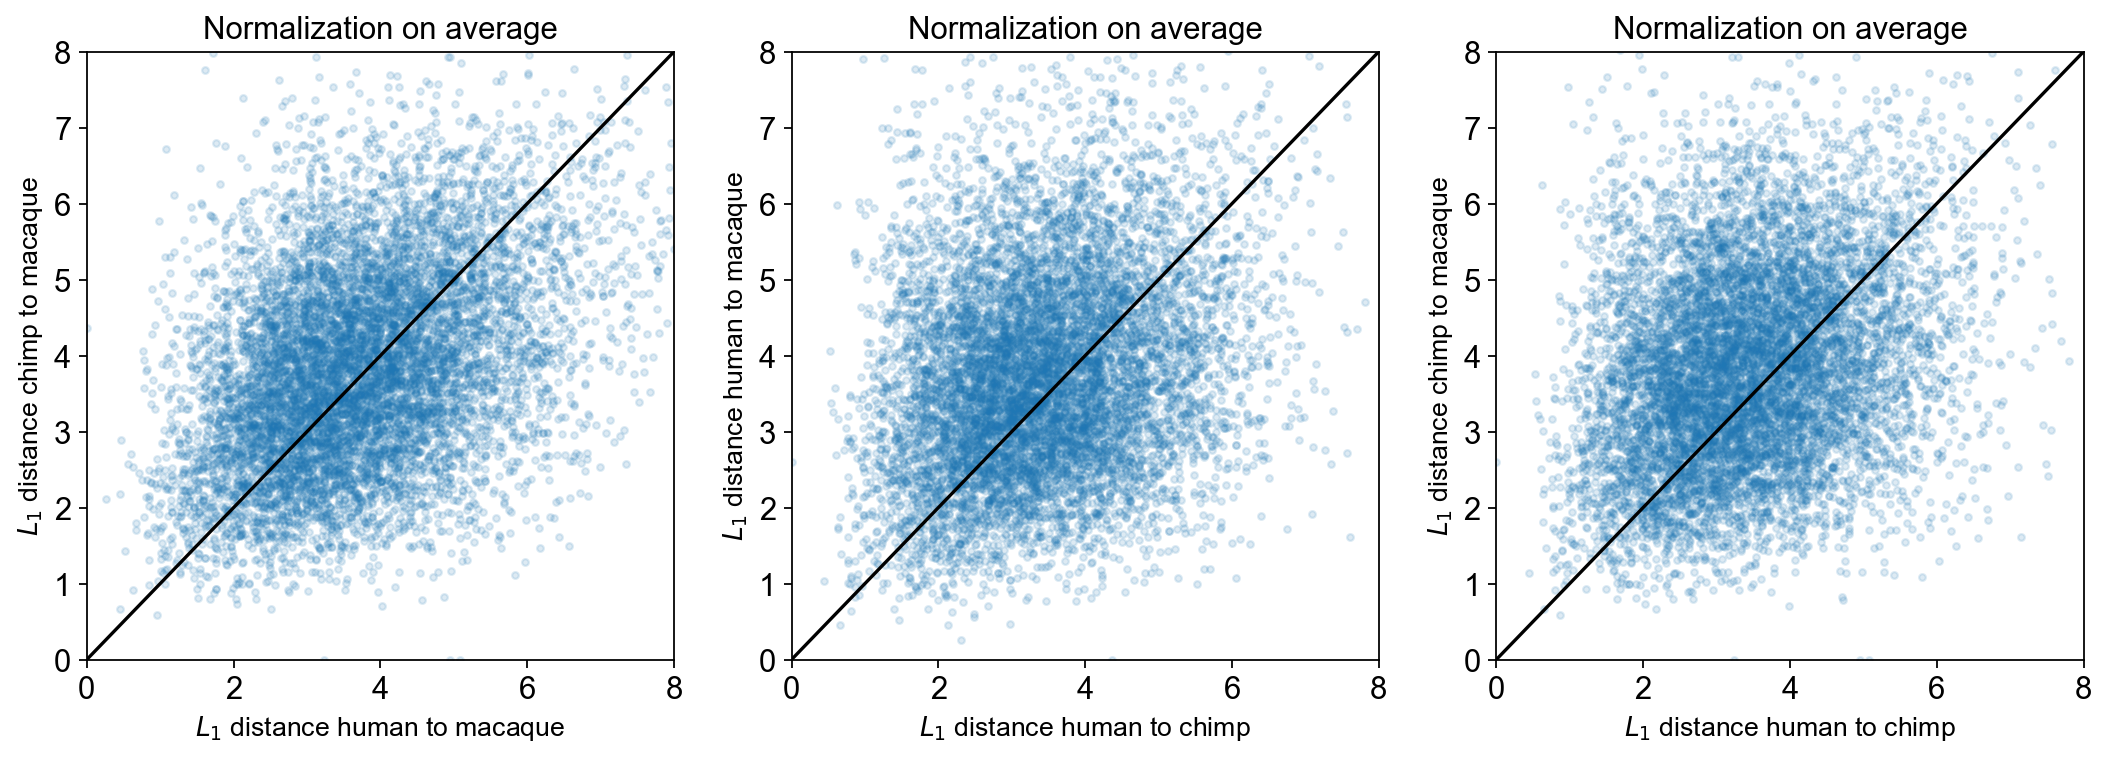

In [58]:
fig, ax = plt.subplots(1, 3, figsize=(16, 5))

ax[0].plot(hm_l1, cm_l1, '.', alpha=0.15)
ax[0].plot([0, 9], [0, 9], 'black')
ax[0].set_title('Normalization on average')
ax[0].set_xlabel('$L_1$ distance human to macaque', fontsize=12)
ax[0].set_ylabel('$L_1$ distance chimp to macaque', fontsize=12)
ax[0].grid(False)
ax[0].set_xlim(0, 8)
ax[0].set_ylim(0, 8)

ax[1].plot(hc_l1, hm_l1, '.', alpha=0.15)
ax[1].plot([0, 9], [0, 9], 'black')
ax[1].set_title('Normalization on average')
ax[1].set_xlabel('$L_1$ distance human to chimp', fontsize=12)
ax[1].set_ylabel('$L_1$ distance human to macaque', fontsize=12)
ax[1].grid(False)
ax[1].set_xlim(0, 8)
ax[1].set_ylim(0, 8)

ax[2].plot(hc_l1, cm_l1, '.', alpha=0.15)
ax[2].plot([0, 9], [0, 9], 'black')
ax[2].set_title('Normalization on average')
ax[2].set_xlabel('$L_1$ distance human to chimp', fontsize=12)
ax[2].set_ylabel('$L_1$ distance chimp to macaque', fontsize=12)
ax[2].grid(False)
ax[2].set_xlim(0, 8)
ax[2].set_ylim(0, 8)

In [59]:
hc_l1 = human_chimp_diff.abs().sum(axis=1)
hm_l1 = human_macaque_diff.abs().sum(axis=1)
cm_l1 = chimp_macaque_diff.abs().sum(axis=1)

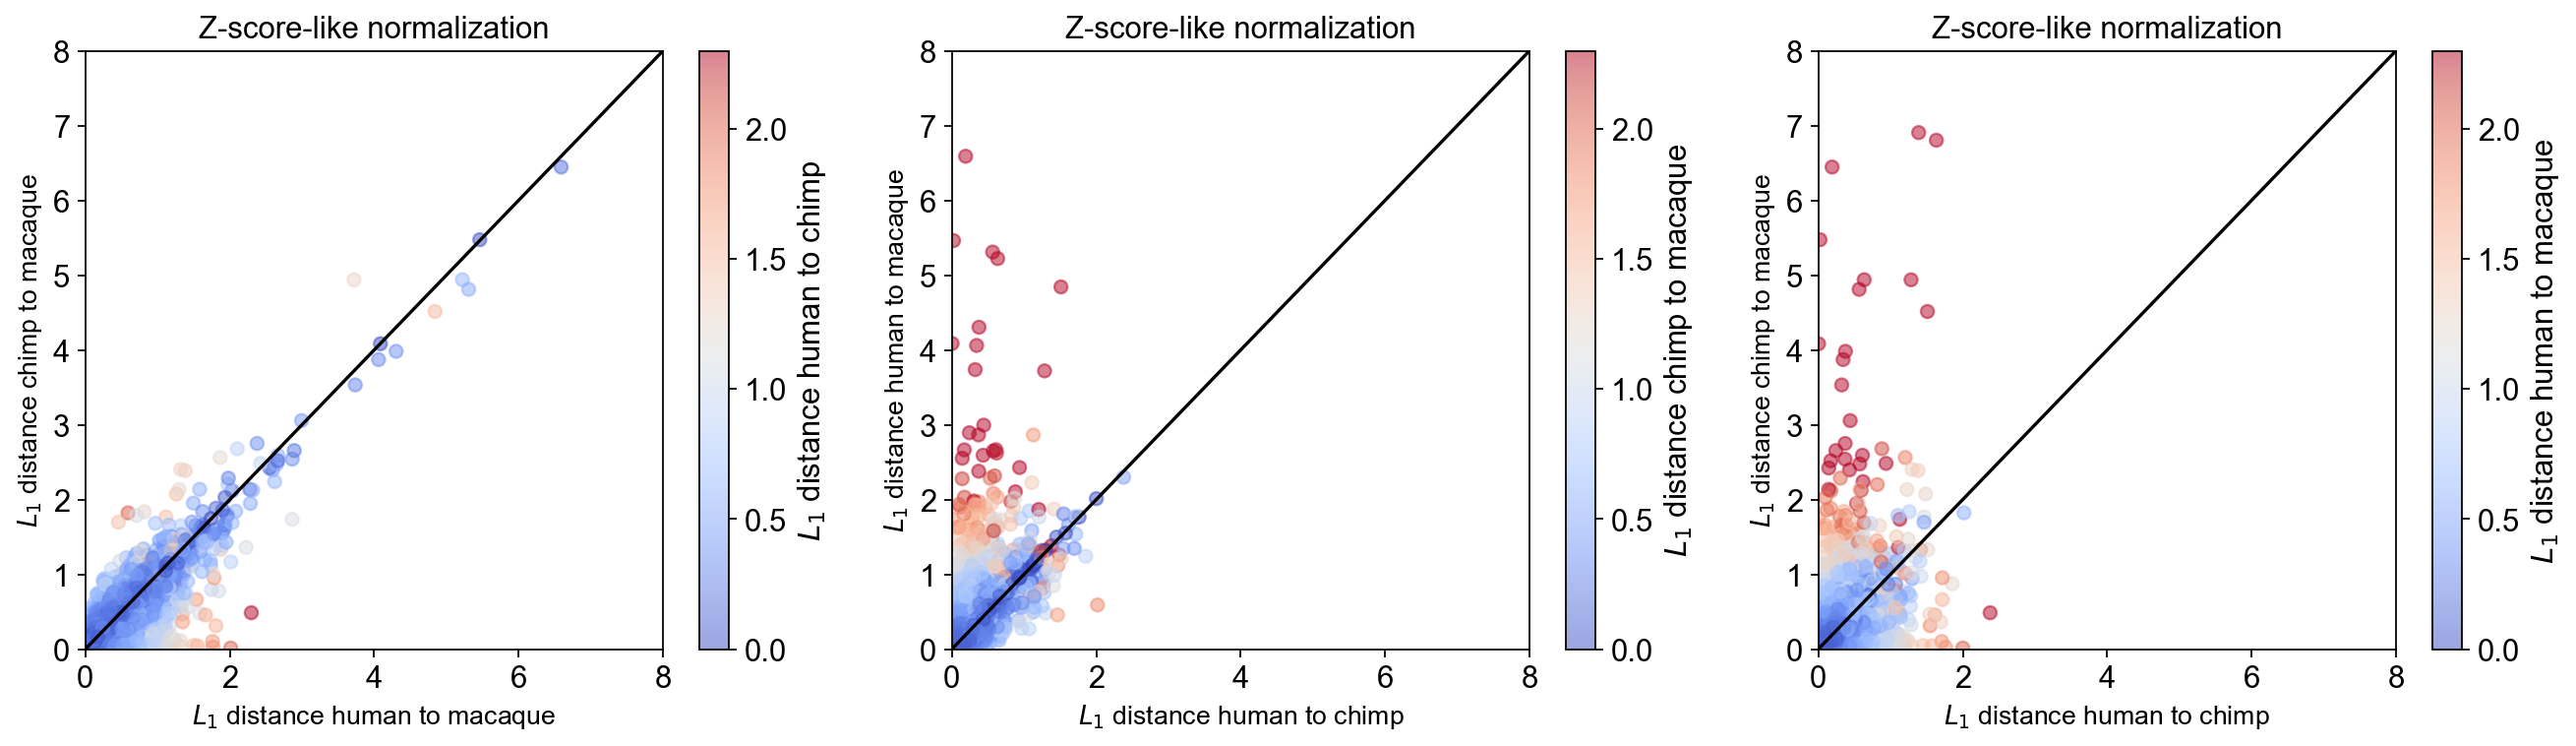

In [60]:
import matplotlib as mpl
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
cmap = mpl.cm.coolwarm
norm = mpl.colors.Normalize(vmin=0, vmax=2.3, clip=True)
marker = 'o'
alpha = 0.5

im = ax[0].scatter(hm_l1, cm_l1, c=hc_l1, alpha=alpha, cmap=cmap, norm=norm, marker=marker)
ax[0].plot([0, 9], [0, 9], 'black')
ax[0].set_title('Z-score-like normalization')
ax[0].set_xlabel('$L_1$ distance human to macaque', fontsize=12)
ax[0].set_ylabel('$L_1$ distance chimp to macaque', fontsize=12)
ax[0].grid(False)
ax[0].set_xlim(0, 8)
ax[0].set_ylim(0, 8)
fig.colorbar(im, ax=ax[0], label="$L_1$ distance human to chimp")

im = ax[1].scatter(hc_l1, hm_l1, c=cm_l1, alpha=alpha, cmap=cmap, norm=norm, marker=marker)
ax[1].plot([0, 9], [0, 9], 'black')
ax[1].set_title('Z-score-like normalization')
ax[1].set_xlabel('$L_1$ distance human to chimp', fontsize=12)
ax[1].set_ylabel('$L_1$ distance human to macaque', fontsize=12)
ax[1].grid(False)
ax[1].set_xlim(0, 8)
ax[1].set_ylim(0, 8)
fig.colorbar(im, ax=ax[1], label="$L_1$ distance chimp to macaque")

im = ax[2].scatter(hc_l1, cm_l1, c=hm_l1, alpha=alpha, cmap=cmap, norm=norm, marker=marker)
ax[2].plot([0, 9], [0, 9], 'black')
ax[2].set_title('Z-score-like normalization')
ax[2].set_xlabel('$L_1$ distance human to chimp', fontsize=12)
ax[2].set_ylabel('$L_1$ distance chimp to macaque', fontsize=12)
ax[2].grid(False)
ax[2].set_xlim(0, 8)
ax[2].set_ylim(0, 8)
fig.colorbar(im, ax=ax[2], label="$L_1$ distance human to macaque")
plt.show()

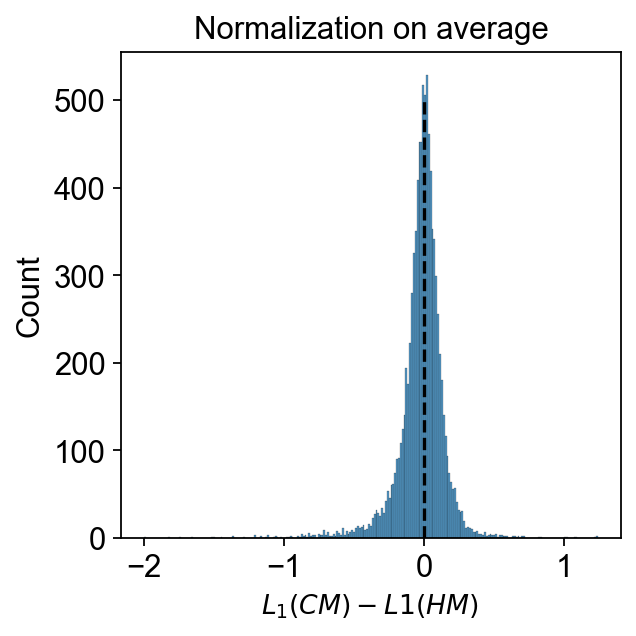

In [61]:
sns.histplot(cm_l1 - hm_l1)
plt.vlines(0, ymin=0, ymax=500, colors='black', linestyles='dashed')
plt.title('Normalization on average')
plt.xlabel('$L_1(CM) - L1(HM)$ ', fontsize=12)
plt.grid(False)

In [62]:
((cm_l1 - hm_l1) < 0).sum(), ((cm_l1 - hm_l1) > 0).sum()

(4719, 4488)

## Human-specific

Filter genes:
$$
L_1(HM) > L_1(CM)
$$

and

$$
L_1(HC) >= q
$$

In [63]:
quantile = 0.95
quant_value = hc_l1.quantile(quantile)
quant_value

0.5346964389085769

Text(0.5, 1.0, '$L_1$ distance human vs chimp')

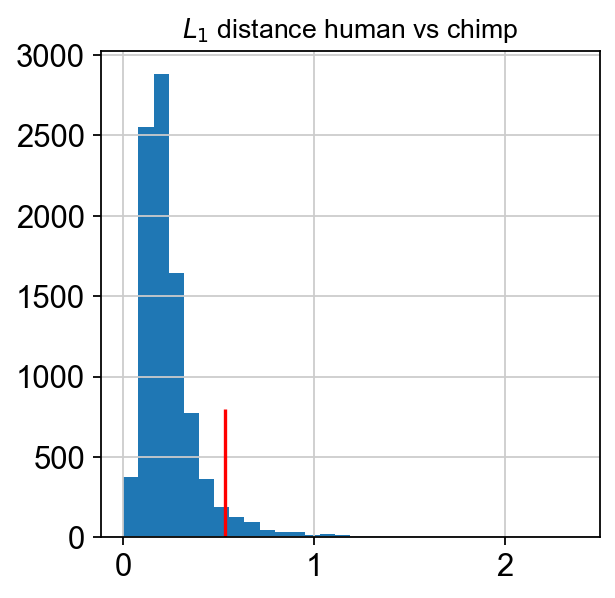

In [64]:
plt.vlines(quant_value, ymin=0, ymax=800,colors='red')
hc_l1.hist(bins=30)
plt.title('$L_1$ distance human vs chimp', fontsize=12)

In [65]:
gene_filter1 = (hm_l1 > cm_l1)
gene_filter2 = (hc_l1 >= quant_value)
gene_filter2.sum()

461

In [66]:
hs_genes = hc_l1[(gene_filter1) & (gene_filter2)].index
hs_genes

Index(['ACSL4', 'ACTA2', 'ADCY1', 'ADD2', 'ADGRB3', 'ADRA2A', 'AGAP1',
       'AKR1C2', 'AKT3', 'ALCAM',
       ...
       'UST', 'VAT1L', 'VSTM2A', 'XKR4', 'XPR1', 'ZBTB18', 'ZBTB20', 'ZBTB34',
       'ZMYND8', 'ZNF385D'],
      dtype='object', length=324)

## Chimp-specific

In [67]:
gene_filter1 = (cm_l1 > hm_l1)
gene_filter2 = (hc_l1 >= quant_value)
gene_filter2.sum()

461

In [68]:
cs_genes = hc_l1[(gene_filter1) & (gene_filter2)].index
cs_genes

Index(['ACTN2', 'AGT', 'AHNAK', 'B2M', 'B3GALT2', 'BAIAP2', 'BRINP3', 'CA10',
       'CALB2', 'CBLN2',
       ...
       'TIMP3', 'TNC', 'TSC22D4', 'TTC9B', 'TXNIP', 'UBE2QL1', 'VIM', 'VWF',
       'WASF1', 'WLS'],
      dtype='object', length=137)

## Macaque-specific

In [69]:
gene_filter1 = (hm_l1 > hc_l1)
gene_filter2 = (cm_l1 >= quant_value)
gene_filter2.sum()

1164

In [70]:
ms_genes = hc_l1[(gene_filter1) & (gene_filter2)].index
ms_genes

Index(['AATK', 'ABAT', 'ABCA2', 'ABCD4', 'ABHD17B', 'ACAD10', 'ACADVL',
       'ACBD7', 'ACSBG1', 'ACSL1',
       ...
       'ZEB2', 'ZFAND3', 'ZFP36L1', 'ZFP36L2', 'ZIC2', 'ZMAT2', 'ZNF184',
       'ZNF483', 'ZNF536', 'ZNF664'],
      dtype='object', length=997)

## Compare a number of human-specific vs chimp-specific

In [71]:
tr_list = np.linspace(0, 4, 100)
hs_num = []
cs_num = []
ms_num = []

for tr in tr_list:
    #qv = hc_l1.quantile(q)
    # hs
    gene_filter1 = (hm_l1 > cm_l1)
    gene_filter2 = (hc_l1 >= tr)
    hs_num.append(hc_l1[(gene_filter1) & (gene_filter2)].index.size)
    # cs
    gene_filter1 = (cm_l1 > hm_l1)
    gene_filter2 = (hc_l1 >= tr)
    cs_num.append(hc_l1[(gene_filter1) & (gene_filter2)].index.size)
    # ms
    gene_filter1 = (hm_l1 > hc_l1)
    gene_filter2 = (cm_l1 >= tr)
    ms_num.append(hm_l1[(gene_filter1) & (gene_filter2)].index.size)

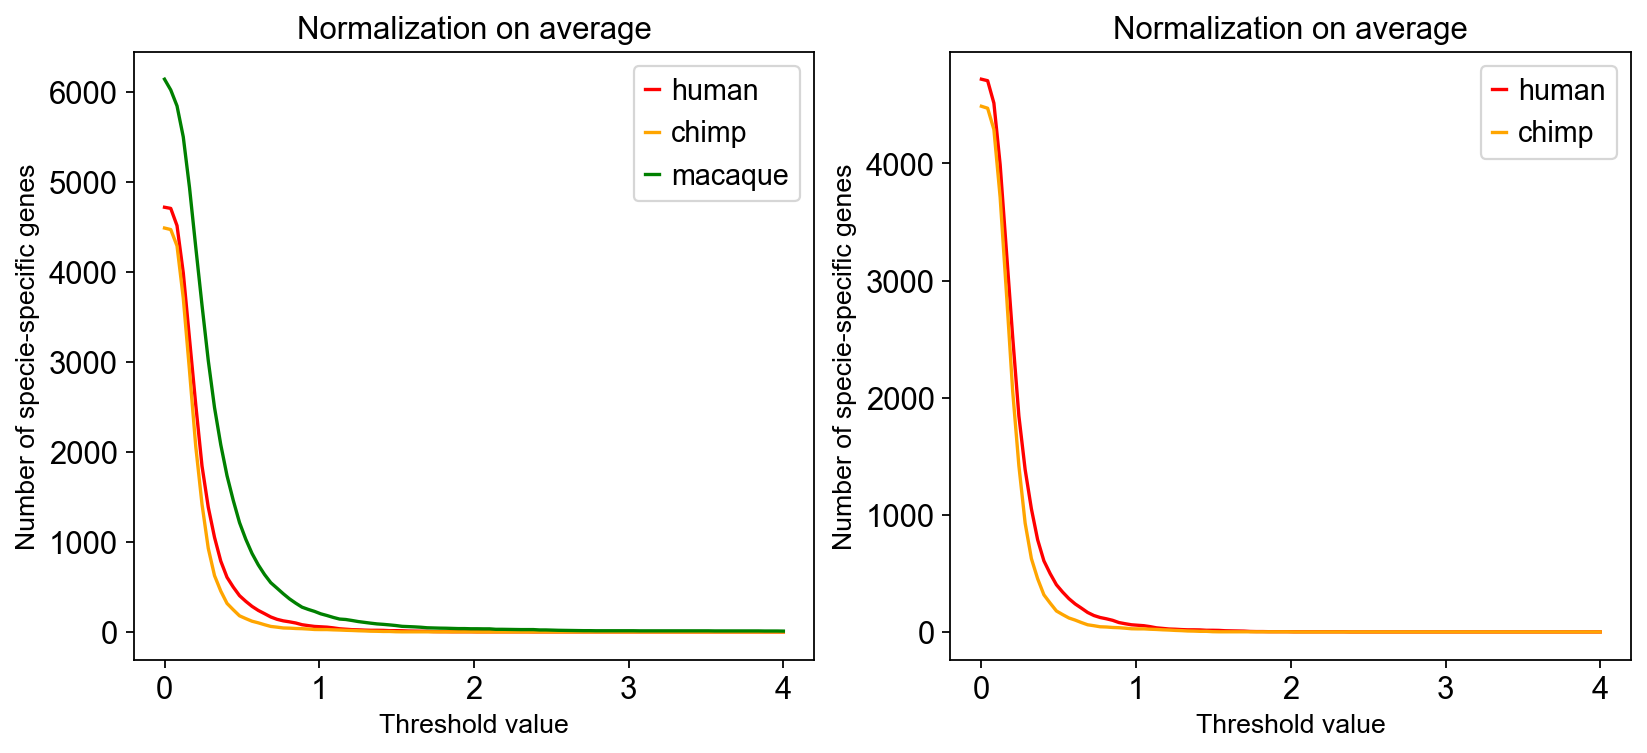

In [72]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(tr_list, hs_num, 'r-')
ax[0].plot(tr_list, cs_num, '-', c='orange')
ax[0].plot(tr_list, ms_num, '-', c='green')
ax[0].set_title('Normalization on average')
ax[0].set_xlabel('Threshold value', fontsize=12)
ax[0].set_ylabel('Number of specie-specific genes', fontsize=12)
ax[0].legend(['human', 'chimp', 'macaque'])
ax[0].grid(False)

ax[1].plot(tr_list, hs_num, 'r-')
ax[1].plot(tr_list, cs_num, '-', c='orange')
ax[1].set_title('Normalization on average')
ax[1].set_xlabel('Threshold value', fontsize=12)
ax[1].set_ylabel('Number of specie-specific genes', fontsize=12)
ax[1].legend(['human', 'chimp', 'macaque'])
ax[1].grid(False)

treshold = 0.7676767676767677


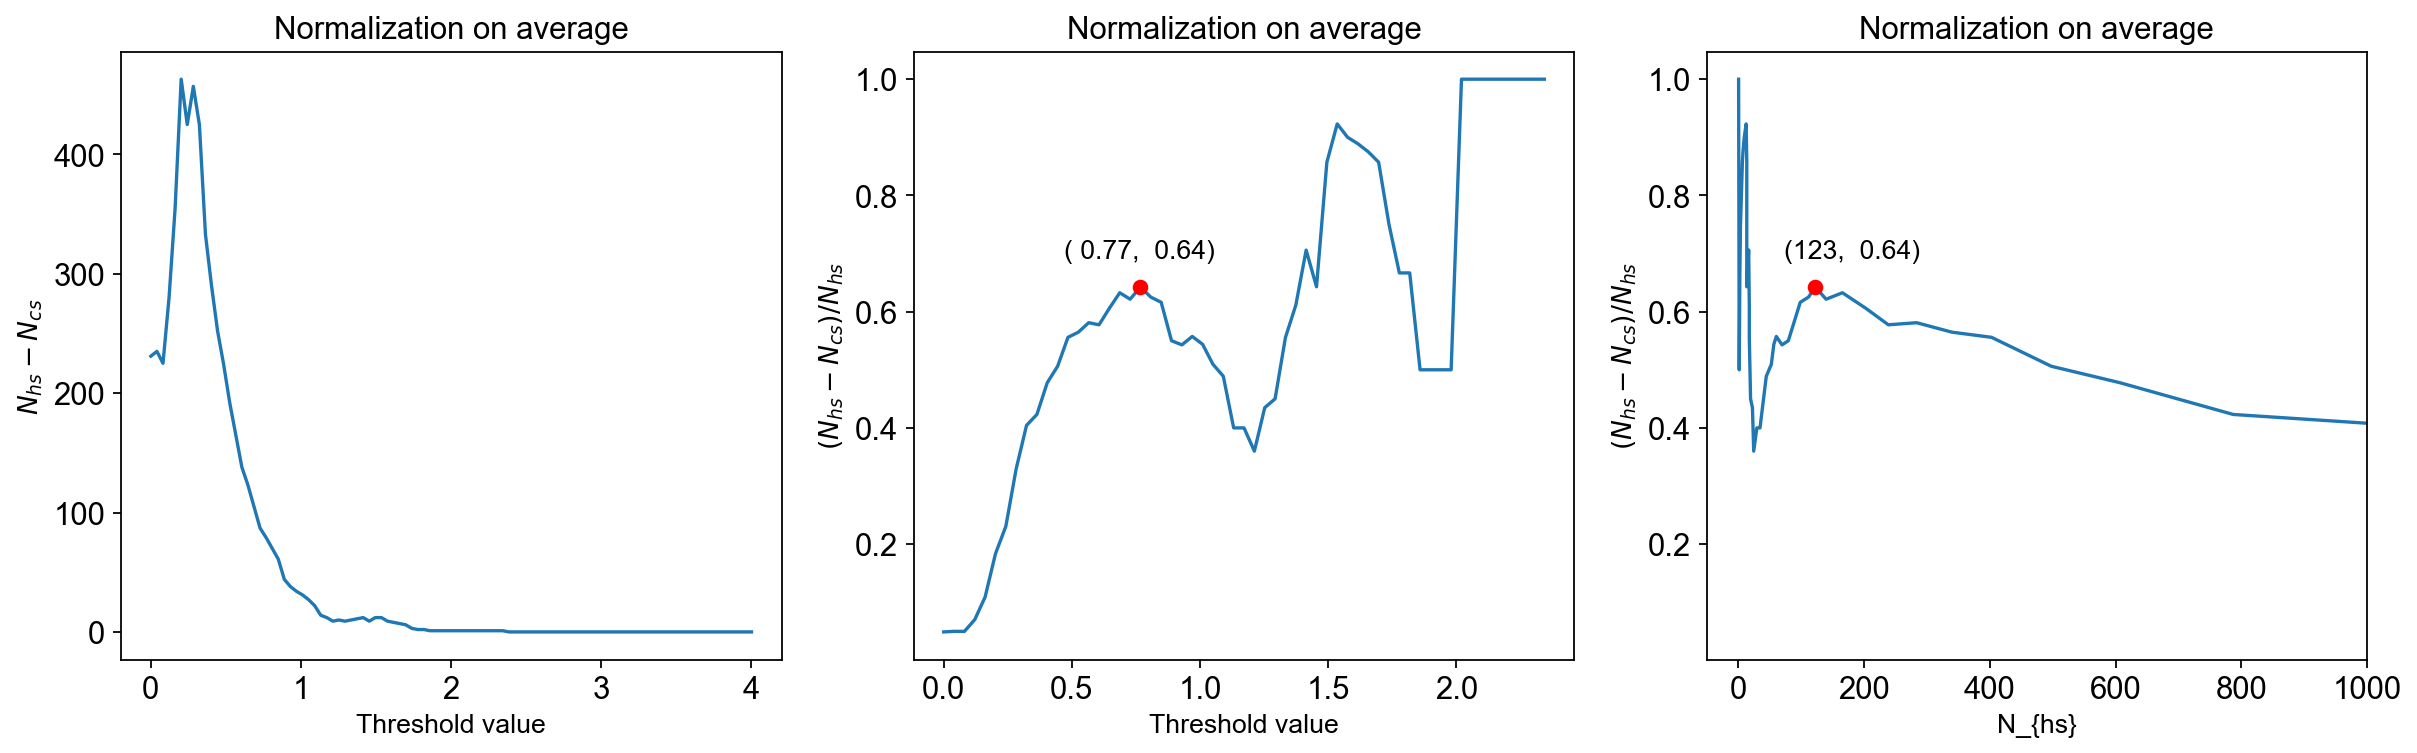

In [73]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

hs_num = np.array(hs_num)
cs_num = np.array(cs_num)
tr_list_num = np.array(tr_list)
nonzero = (hs_num != 0)
ratio = (hs_num[nonzero] - cs_num[nonzero]) / hs_num[nonzero]
ratio_loc_max_idx = ratio[:ratio.size // 2].argmax()
qv_loc_max = tr_list_num[ratio_loc_max_idx]
print(f'treshold = {qv_loc_max}')

ax[0].plot(tr_list, hs_num - cs_num, '-')
#ax[0].hlines(0, xmin=0, xmax=4, colors='black', linestyles='dashed', alpha=0.7)
ax[0].set_title('Normalization on average')
ax[0].set_xlabel('Threshold value', fontsize=12)
ax[0].set_ylabel('$N_{hs} - N_{cs}$', fontsize=12)
ax[0].grid(False)

ax[1].plot(tr_list_num[nonzero], ratio, '-')
ax[1].plot([qv_loc_max], [ratio[ratio_loc_max_idx]], 'ro')
ax[1].text(qv_loc_max - 0.3, ratio[ratio_loc_max_idx] + 0.05, f'({qv_loc_max: .2f}, {ratio[ratio_loc_max_idx]: .2f})', fontsize=12)
#ax[1].hlines(0, xmin=0, xmax=tr_list_num[nonzero].max(), colors='black', linestyles='dashed', alpha=0.7)
ax[1].set_title('Normalization on average')
ax[1].set_xlabel('Threshold value', fontsize=12)
ax[1].set_ylabel('$(N_{hs} - N_{cs}) / N_{hs}$', fontsize=12)
ax[1].grid(False)

ax[2].plot(hs_num[nonzero], ratio, '-')
ax[2].plot([hs_num[ratio_loc_max_idx]], [ratio[ratio_loc_max_idx]], 'ro')
ax[2].text(hs_num[ratio_loc_max_idx] - 50, ratio[ratio_loc_max_idx] + 0.05, f'({hs_num[ratio_loc_max_idx]}, {ratio[ratio_loc_max_idx]: .2f})', fontsize=12)
#ax[2].hlines(0, xmin=0, xmax=tr_list_num[nonzero].max(), colors='black', linestyles='dashed', alpha=0.7)
ax[2].set_title('Normalization on average')
ax[2].set_xlabel('N_{hs}', fontsize=12)
ax[2].set_ylabel('$(N_{hs} - N_{cs}) / N_{hs}$', fontsize=12)
ax[2].set_xlim(-50, 1000)
ax[2].grid(False)

In [74]:
subtr = hs_num - cs_num
subtr.argsort()
#qv_loc_max = 
#print(f'treshold = {qv_loc_max}')

array([99, 76, 75, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60,
       59, 77, 78, 74, 80, 97, 96, 95, 94, 79, 92, 91, 90, 89, 93, 87, 88,
       81, 82, 98, 84, 85, 86, 83, 50, 57, 56, 55, 54, 53, 52, 51, 58, 49,
       47, 48, 46, 45, 44, 43, 42, 41, 40, 39, 30, 36, 32, 31, 33, 34, 37,
       38, 29, 35, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15,
       14, 13, 12,  2,  0,  1, 11,  3, 10,  9,  4,  8,  6,  7,  5],
      dtype=int64)

In [75]:
subtr[7]

457

treshold1 = 0.7676767676767677
treshold2 = 0.2828282828282829


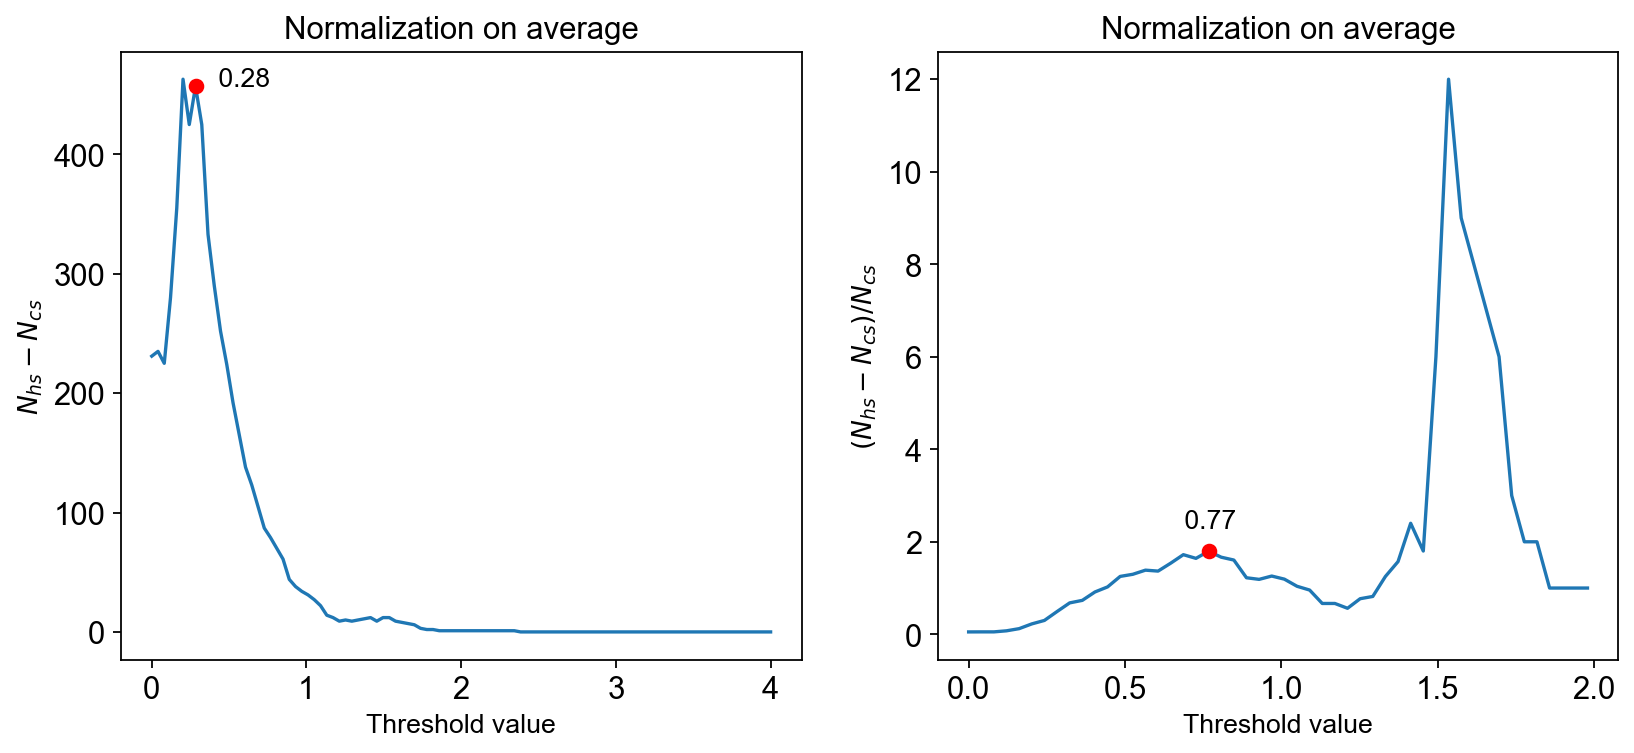

In [76]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

hs_num = np.array(hs_num)
cs_num = np.array(cs_num)
tr_list_num = np.array(tr_list)
nonzero = (cs_num != 0)
ratio = (hs_num[nonzero] - cs_num[nonzero]) / cs_num[nonzero]
ratio_loc_max_idx = ratio[:ratio.size // 2].argmax()
qv_loc_max = tr_list_num[ratio_loc_max_idx]
print(f'treshold1 = {qv_loc_max}')

subtr = hs_num - cs_num
qv_loc_max2_idx = subtr.argsort()[-2]
qv_loc_max2 = tr_list_num[qv_loc_max2_idx]
print(f'treshold2 = {qv_loc_max2}')

ax[0].plot(tr_list, hs_num - cs_num, '-')
#ax[0].hlines(0, xmin=0, xmax=4, colors='black', linestyles='dashed', alpha=0.7)
ax[0].plot([qv_loc_max2], [subtr[qv_loc_max2_idx]], 'ro')
ax[0].text(qv_loc_max2 + 0.1, subtr[qv_loc_max2_idx] + 0.5, f'{qv_loc_max2: .2f}', fontsize=12)
ax[0].set_title('Normalization on average')
ax[0].set_xlabel('Threshold value', fontsize=12)
ax[0].set_ylabel('$N_{hs} - N_{cs}$', fontsize=12)
ax[0].grid(False)

ax[1].plot(tr_list_num[nonzero], ratio, '-')
ax[1].plot([qv_loc_max], [ratio[ratio_loc_max_idx]], 'ro')
ax[1].text(qv_loc_max - 0.1, ratio[ratio_loc_max_idx] + 0.5, f'{qv_loc_max: .2f}', fontsize=12)
#ax[1].vlines(qv_loc_max, ymin=0, ymax=12, color='red')
#ax[1].hlines(0, xmin=0, xmax=tr_list_num[nonzero].max(), colors='black', linestyles='dashed', alpha=0.7)
ax[1].set_title('Normalization on average')
ax[1].set_xlabel('Threshold value', fontsize=12)
ax[1].set_ylabel('$(N_{hs} - N_{cs}) / N_{сs}$', fontsize=12)
ax[1].grid(False)

In [77]:
argmax = ratio[:ratio.size // 2].argmax()
tr_list_num[argmax]

0.7676767676767677

In [78]:
diff = hs_num - cs_num
hs_num[(diff == 457)], cs_num[(diff == 457)]

(array([1386]), array([929]))

# Apply threshold

## Threshold 1

In [79]:
tr_value = qv_loc_max
tr_value

0.7676767676767677

### Human-specific

In [80]:
gene_filter1 = (hm_l1 > cm_l1)
gene_filter2 = (hc_l1 >= tr_value)
gene_filter2.sum()

167

In [81]:
hs_genes = hc_l1[(gene_filter1) & (gene_filter2)].index
hs_genes

Index(['ACTA2', 'ADCY1', 'ADRA2A', 'ALCAM', 'B3GAT2', 'BASP1', 'BPTF',
       'CAMK2N2', 'CCK', 'CDC42EP3',
       ...
       'TAFA2', 'TENM2', 'TOX', 'TOX3', 'TRPM3', 'TTC3', 'UBAP2', 'XKR4',
       'ZBTB18', 'ZBTB20'],
      dtype='object', length=123)

### Chimp-specific

In [82]:
gene_filter1 = (cm_l1 > hm_l1)
gene_filter2 = (hc_l1 >= tr_value)
gene_filter2.sum()

167

In [83]:
cs_genes = hc_l1[(gene_filter1) & (gene_filter2)].index
cs_genes, cs_genes.size

(Index(['ACTN2', 'AGT', 'B3GALT2', 'CALB2', 'CBLN2', 'CELF4', 'CLEC3B', 'CRYAB',
        'CXCL14', 'CYP26A1', 'DYNC1I1', 'EPHA3', 'ETV1', 'GLUL', 'GRIA4', 'ID1',
        'ID3', 'IGFBP5', 'ITM2A', 'MASP1', 'MCUB', 'MLC1', 'MOAP1', 'NELL1',
        'NEUROD6', 'NFIA', 'NPTX1', 'NR4A2', 'QKI', 'RASL11B', 'RELN', 'RPRM',
        'SLC1A2', 'SNORC', 'SPARC', 'SPON1', 'SPP1', 'SST', 'SULF1', 'SV2B',
        'THBS1', 'TIMP3', 'TSC22D4', 'WASF1'],
       dtype='object'),
 44)

### Macaque-specific

In [84]:
gene_filter1 = (hm_l1 > hc_l1)
gene_filter2 = (cm_l1 >= tr_value)
gene_filter2.sum()

480

In [85]:
ms_genes = hc_l1[(gene_filter1) & (gene_filter2)].index
ms_genes

Index(['AATK', 'ABHD17B', 'ACAD10', 'ACBD7', 'ACTN1', 'ADCYAP1R1', 'ADD3',
       'AGT', 'AIDA', 'AIFM3',
       ...
       'VIM', 'VIT', 'VSNL1', 'VSTM2L', 'VXN', 'WIF1', 'ZCCHC12', 'ZDHHC9',
       'ZFP36L2', 'ZNF483'],
      dtype='object', length=424)

## Let's look at them

Let's look at human~chimp scatterplot in raw counts

(-0.5, 20.0)

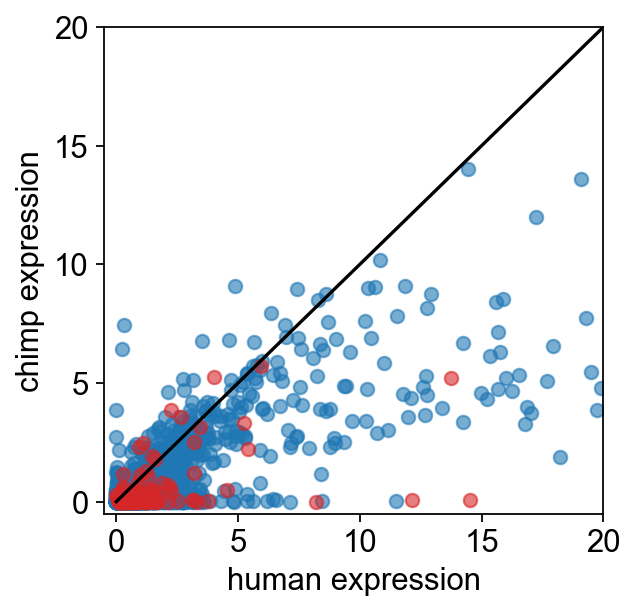

In [188]:
genes = adata_pb.var_names.difference(hs_genes)
human_expr = adata_pb[adata_pb.obs.condition == 'human', genes].X.mean(axis=0)
chimp_expr = adata_pb[adata_pb.obs.condition == 'chimp', genes].X.mean(axis=0)

plt.scatter(human_expr, chimp_expr, c='tab:blue', marker='o', alpha=0.6)

genes = hs_genes
human_expr = adata_pb[adata_pb.obs.condition == 'human', genes].X.mean(axis=0)
chimp_expr = adata_pb[adata_pb.obs.condition == 'chimp', genes].X.mean(axis=0)

plt.scatter(human_expr, chimp_expr, c='tab:red', marker='o', alpha=0.6)
plt.plot([0, 80], [0, 80], 'black')
plt.xlabel('human expression')
plt.ylabel('chimp expression')
plt.grid(False)
plt.xlim(-0.5, 20)
plt.ylim(-0.5, 20)

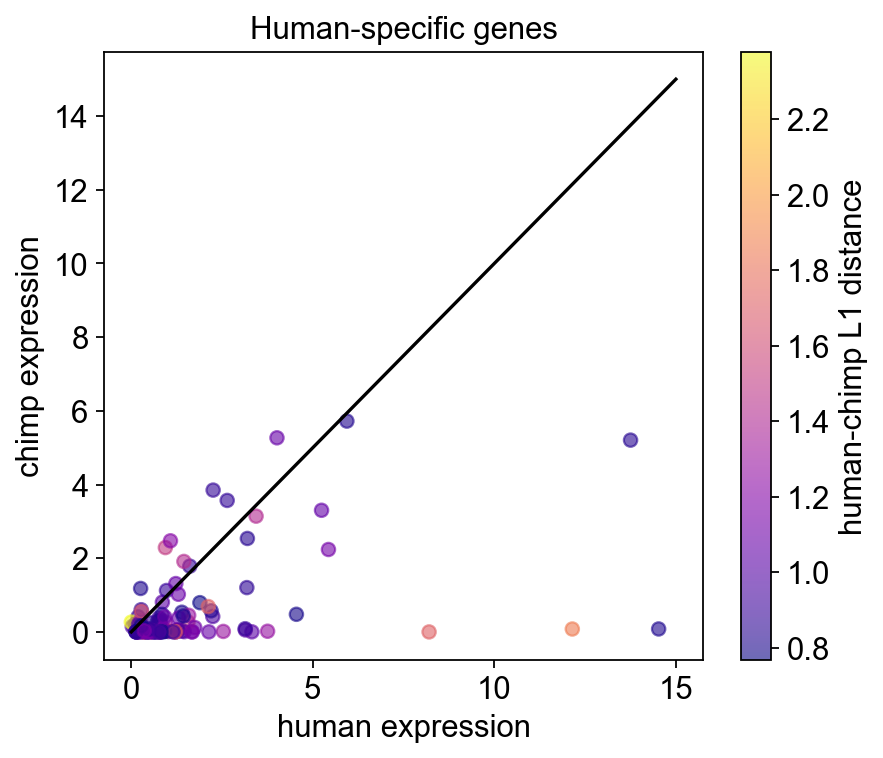

In [206]:
plt.figure(figsize=(6, 5))
cmap = mpl.cm.plasma
genes = hs_genes
human_expr = adata_pb[adata_pb.obs.condition == 'human', genes].X.mean(axis=0)
chimp_expr = adata_pb[adata_pb.obs.condition == 'chimp', genes].X.mean(axis=0)

plt.scatter(human_expr, chimp_expr, marker='o', c=hc_l1.loc[genes], alpha=0.6, cmap=cmap)
plt.plot([0, 15], [0, 15], 'black')
plt.xlabel('human expression')
plt.ylabel('chimp expression')
plt.title('Human-specific genes')
plt.grid(False)
#plt.xlim(-0.5, 20)
#plt.ylim(-0.5, 20)
plt.colorbar(label='human-chimp L1 distance')

<Axes: xlabel='condition', ylabel='log_lib_size'>

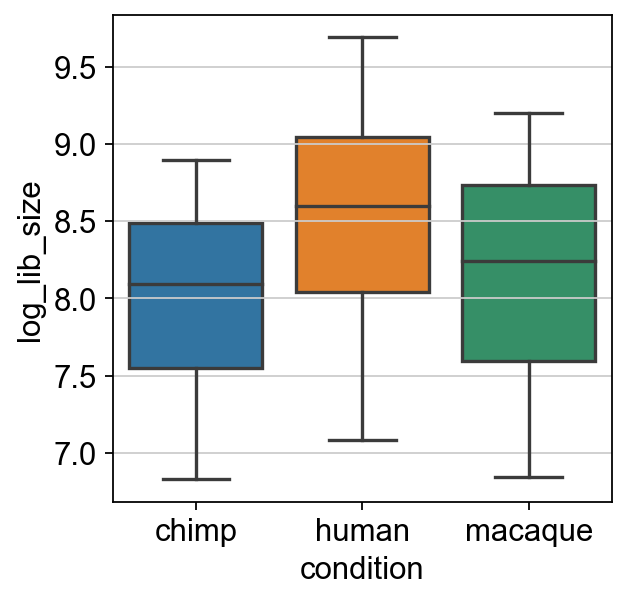

In [213]:
sns.boxplot(data=adata_pb.obs, y='log_lib_size', x='condition')

Let's normalise data now

In [215]:
adata_norm = adata_pb.copy()
sc.pp.normalize_total(adata_norm, target_sum=1e4)
sc.pp.log1p(adata_norm)

normalizing counts per cell
    finished (0:00:00)


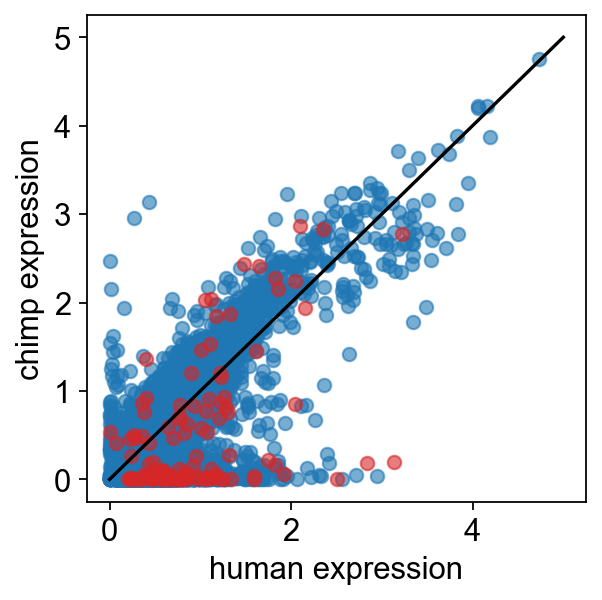

In [218]:
genes = adata_norm.var_names.difference(hs_genes)
human_expr = adata_norm[adata_norm.obs.condition == 'human', genes].X.mean(axis=0)
chimp_expr = adata_norm[adata_norm.obs.condition == 'chimp', genes].X.mean(axis=0)

plt.scatter(human_expr, chimp_expr, c='tab:blue', marker='o', alpha=0.6)

genes = hs_genes
human_expr = adata_norm[adata_norm.obs.condition == 'human', genes].X.mean(axis=0)
chimp_expr = adata_norm[adata_norm.obs.condition == 'chimp', genes].X.mean(axis=0)

plt.scatter(human_expr, chimp_expr, c='tab:red', marker='o', alpha=0.6)
plt.plot([0, 5], [0, 5], 'black')
plt.xlabel('human expression')
plt.ylabel('chimp expression')
plt.grid(False)
#plt.xlim(-0.5, 20)
#plt.ylim(-0.5, 20)

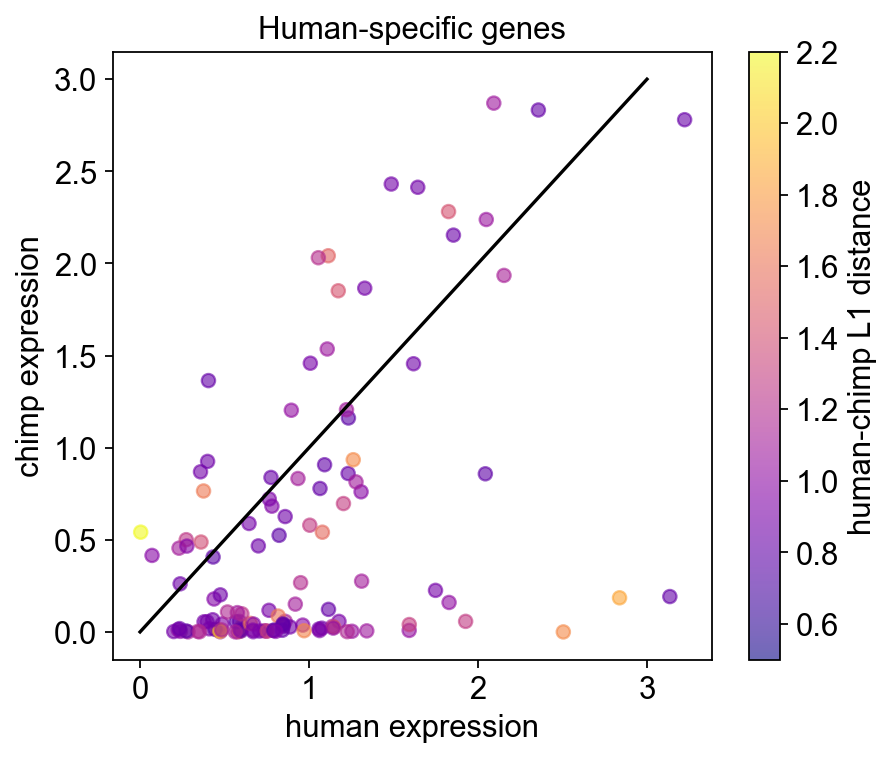

In [225]:
plt.figure(figsize=(6, 5))
cmap = mpl.cm.plasma
norm = mpl.colors.Normalize(vmin=0.5, vmax=2.2, clip=True)

genes = hs_genes
human_expr = adata_norm[adata_norm.obs.condition == 'human', genes].X.mean(axis=0)
chimp_expr = adata_norm[adata_norm.obs.condition == 'chimp', genes].X.mean(axis=0)

plt.scatter(human_expr, chimp_expr, marker='o', c=hc_l1.loc[genes], alpha=0.6, cmap=cmap, norm=norm)
plt.plot([0, 3], [0, 3], 'black')
plt.xlabel('human expression')
plt.ylabel('chimp expression')
plt.title('Human-specific genes')
plt.grid(False)
#plt.xlim(-0.5, 20)
#plt.ylim(-0.5, 20)
plt.colorbar(label='human-chimp L1 distance')

### Save results

In [86]:
import pickle

genes_dict = {
    'human': hs_genes,
    'chimp': cs_genes,
    'macaque': ms_genes
}
# save all gene lists
with open('results/specie_specific_genes_tr77.pkl', 'wb') as f:
    pickle.dump(genes_dict, f)

## Threshold 2

In [74]:
tr_value = qv_loc_max2
tr_value

0.2828282828282829

### Human-specific

In [75]:
gene_filter1 = (hm_l1 > cm_l1)
gene_filter2 = (hc_l1 >= tr_value)
gene_filter2.sum()

2315

In [76]:
hs_genes = hc_l1[(gene_filter1) & (gene_filter2)].index
hs_genes

Index(['A1BG', 'AADAT', 'AAK1', 'AASDHPPT', 'ABCA3', 'ABHD6', 'ABI2', 'ABR',
       'ABRACL', 'ACSL1',
       ...
       'ZNF385B', 'ZNF385D', 'ZNF593', 'ZNF608', 'ZNF638', 'ZNF704', 'ZNF706',
       'ZNRF3', 'ZSWIM6', 'ZYX'],
      dtype='object', length=1386)

### Chimp-specific

In [77]:
gene_filter1 = (cm_l1 > hm_l1)
gene_filter2 = (hc_l1 >= tr_value)
gene_filter2.sum()

2315

In [78]:
cs_genes = hc_l1[(gene_filter1) & (gene_filter2)].index
cs_genes, cs_genes.size

(Index(['ABHD5', 'ABI3BP', 'ABLIM3', 'ACHE', 'ACTL6B', 'ACTN2', 'ACTR1A',
        'ADAM19', 'ADAM23', 'ADCYAP1R1',
        ...
        'ZFP36L1', 'ZFPL1', 'ZMAT3', 'ZNF292', 'ZNF358', 'ZNF536', 'ZNF697',
        'ZNF74', 'ZNF771', 'ZWILCH'],
       dtype='object', length=929),
 929)

### Macaque-specific

In [79]:
gene_filter1 = (hm_l1 > hc_l1)
gene_filter2 = (cm_l1 >= tr_value)
gene_filter2.sum()

3823

In [80]:
ms_genes = hc_l1[(gene_filter1) & (gene_filter2)].index
ms_genes

Index(['A1BG', 'AACS', 'AARS1', 'AASDHPPT', 'AASS', 'AATK', 'ABAT', 'ABCA2',
       'ABCC10', 'ABCD3',
       ...
       'ZNF644', 'ZNF655', 'ZNF664', 'ZNF689', 'ZNF703', 'ZNF711', 'ZNF768',
       'ZNF791', 'ZNHIT1', 'ZNHIT3'],
      dtype='object', length=3016)

### Save results

In [81]:
import pickle

genes_dict = {
    'human': hs_genes,
    'chimp': cs_genes,
    'macaque': ms_genes
}
# save all gene lists
with open('results/specie_specific_genes_tr28.pkl', 'wb') as f:
    pickle.dump(genes_dict, f)